In [2]:
from sklearn.neighbors import KernelDensity
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize
from ase.neighborlist import neighbor_list as nl
import matplotlib.pyplot as plt
import matplotlib.cm
from scipy import constants
from ase.io import read
import numpy as np
plt.style.use('/home/nwlundgren/spanners/matsci/miscellaneous/mpltstyle.txt')

In [42]:
#fullerite = np.load('../ta-c/generation_3/fullerite/0.foundry/structuralinfo.npy')
#annquench = np.load('../ta-c/generation_3/annealedquench/oldstrucs.npy')
# '#2D4059', '#EA5455', '#F07B3F', '#FFD460'
# '#EB5353', '#F9D923', '#36AE7C', '#187498'
# '#495867'    '#89aae6'   '#e77728' '#ffe66d'     '#fe5f55'
# Payne's gray Vista Blue  Pumpkin  Naples yellow Bittersweet
styles = {
    'fullerite':
        {
            'linecor' : '#2D4059',
            'linestyle' : '-',
            'scattercor' : '#2D4059',
            'scattshape' : 'o',
        },
    'annealedquench':
        {
            'linecor' : '#EA5455',
            'linestyle' : ':',
            'scattercor' : '#EA5455',
            'scattshape' : 'd',
        }
}

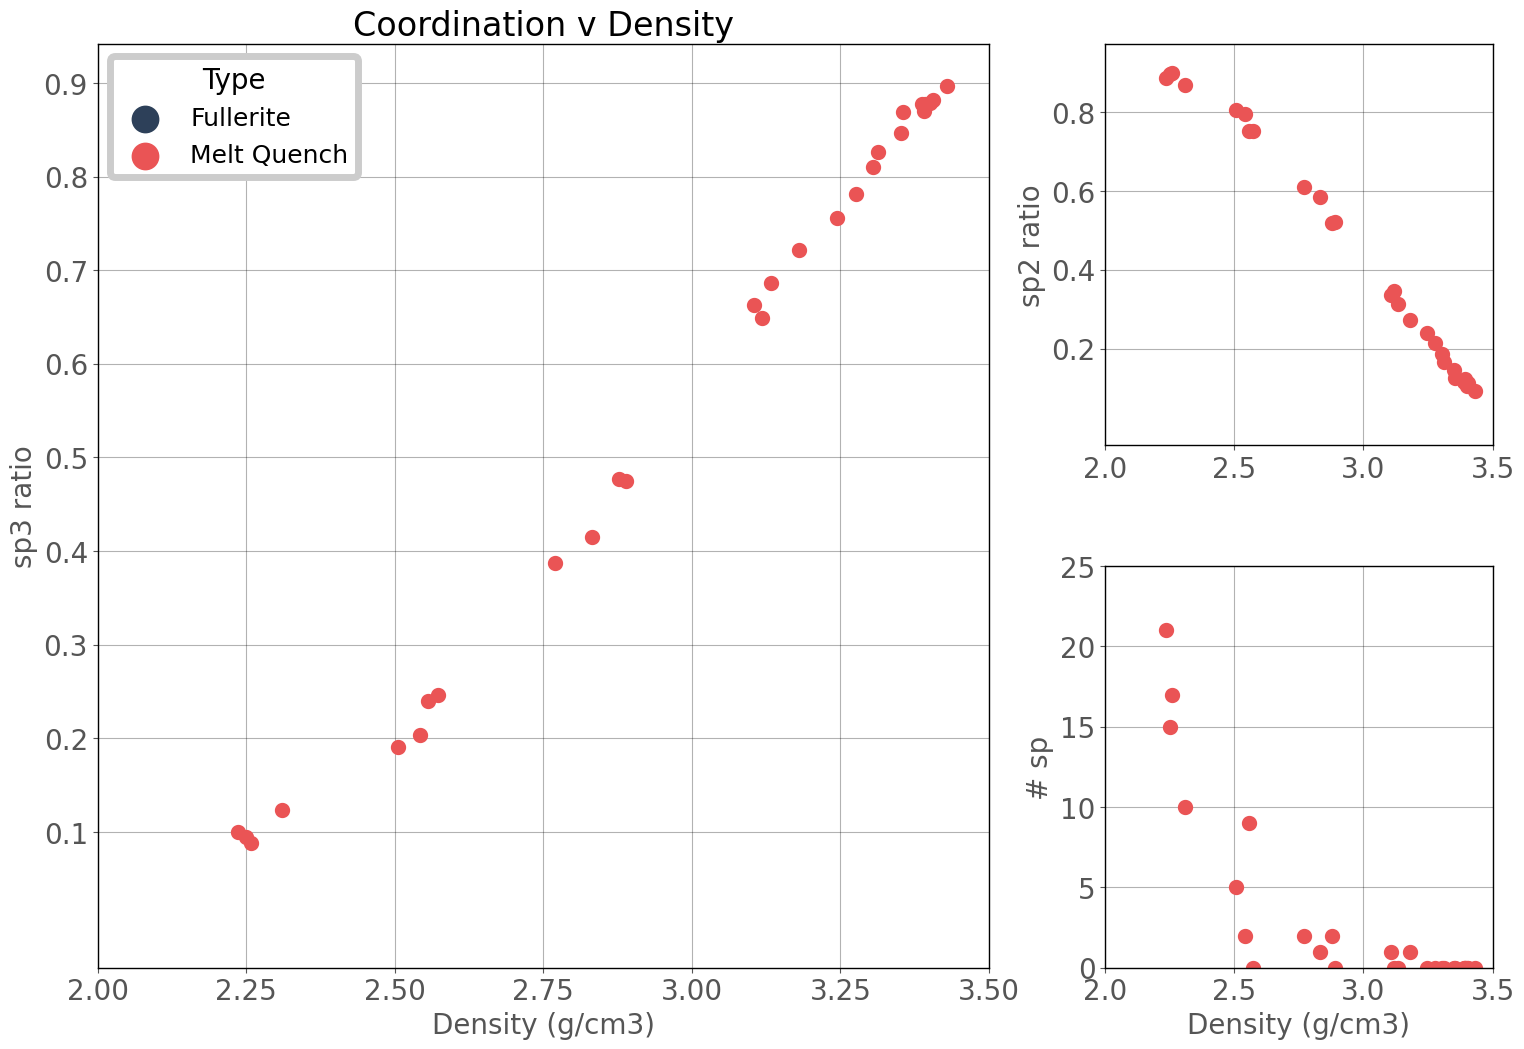

In [6]:
fullerite = np.load('../ta-c/generation_3/fullerite/plotdata/structuralinfo.npy')
annquench = np.load('../ta-c/generation_3/annealedquench/oldstrucs.npy')
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(grid[:, :2])
ax2 = fig.add_subplot(grid[0, 2])
ax3 = fig.add_subplot(grid[1, 2])
blue = styles['fullerite']['scattercor']
red = styles['annealedquench']['scattercor']

ax1.set_title(r'Coordination v Density')
ax1.set_xlabel('Density (g/cm3)')
ax1.set_ylabel('sp3 ratio')
ax1.scatter(fullerite['den'], fullerite['sp3'], color=blue, marker='o', label='Fullerite')
ax1.scatter(annquench['den'], annquench['sp3'], color=red, marker='o', label='Melt Quench',)
ax1.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax1.set_xticks([2, 2.25, 2.5, 2.75, 3, 3.25, 3.5])
ax1.set_xlim([2, 3.5])
ax1.grid(axis='both', color='k', alpha=0.3)
ax1.legend(title='Type')

ax2.set_ylabel('sp2 ratio')
ax2.scatter(fullerite['den'], fullerite['sp2'], color=blue, marker='o', )
ax2.scatter(annquench['den'], annquench['sp2'], color=red, marker='o', label='Melt Quench',)
ax2.set_yticks([0.2, 0.4, 0.6, 0.8,])
ax2.set_xticks([2, 2.5, 3, 3.5])
ax2.set_xlim([2, 3.5])
ax2.grid(axis='both', color='k', alpha=0.3)

ax3.set_xlabel('Density (g/cm3)')
ax3.set_ylabel('# sp')
ax3.scatter(fullerite['den'], fullerite['sp']*1920, color=blue, marker='o', )
ax3.scatter(annquench['den'], annquench['sp']*1728, color=red, marker='o', label='Melt Quench',)
ax3.set_xticks([2, 2.5, 3, 3.5])
ax3.set_xlim([2, 3.5])
ax3.set_ylim([0, 25])
ax3.grid(axis='both', color='k', alpha=0.3)

ax3 = None; ax2 = None; ax1 = None; grid = None;
del ax3; del ax2; del ax1; del grid
fig = None; del fig
annealedquench, fullerite = None, None
del annealedquench, fullerite

/tmp/ipykernel_8073/1202443748.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')


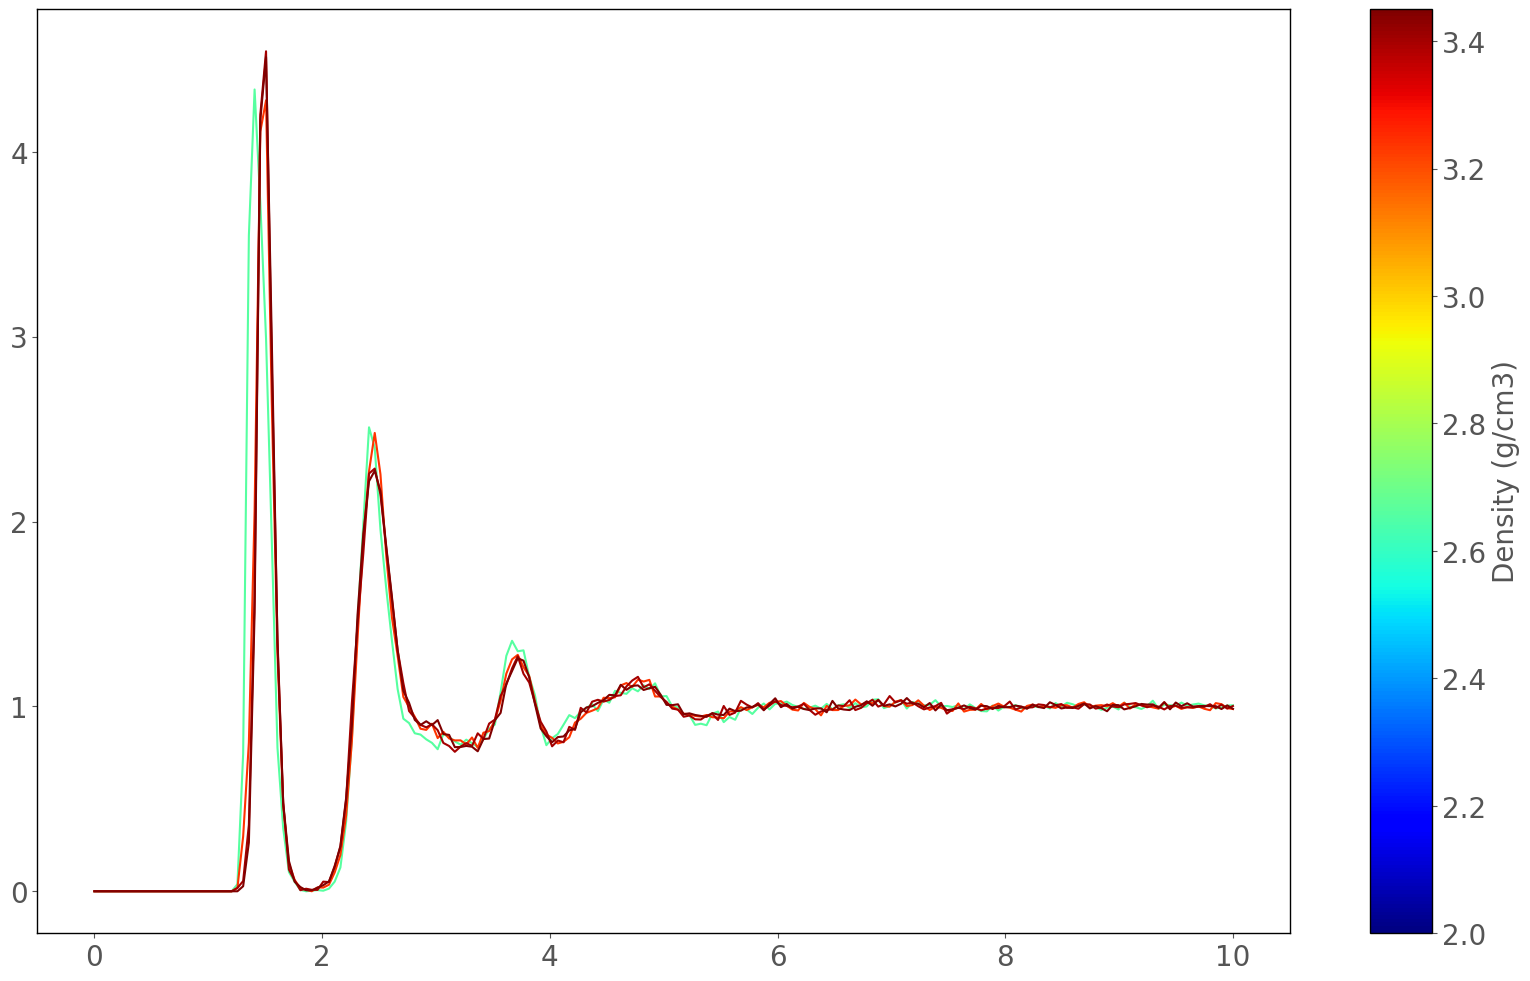

In [7]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(grid[:, :])
dnorms = Normalize(vmin=2, vmax=fullerite['den'].max())
jet = cm.get_cmap('jet')
plotpressure=[12, 18, 24, 36]

divider = make_axes_locatable(ax1)
cax = divider.new_horizontal(size='5%', pad=0.8, pack_start=False)
cax.yaxis.set_label_position('right')
cax.yaxis.tick_right()
fig.add_axes(cax)
fig.colorbar(cm.ScalarMappable(norm=dnorms, cmap=jet), cax=cax)
cax.set_xticks([])
#cax.set_yticks([2.0, 2.5, 3.0, 3.5])
cax.set_ylabel('Density (g/cm3)')

for model in fullerite[1:]:
    if not(model['press'] in plotpressure):
        continue
    color = jet(dnorms(model['den']))
    radial = model['radial']
    x = np.linspace(0, 10, radial.size)    
    ax1.plot(x, model['radial'], color=color)

/tmp/ipykernel_36542/4192272306.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')


Text(0.5, 0, 'Correlation time (ps)')

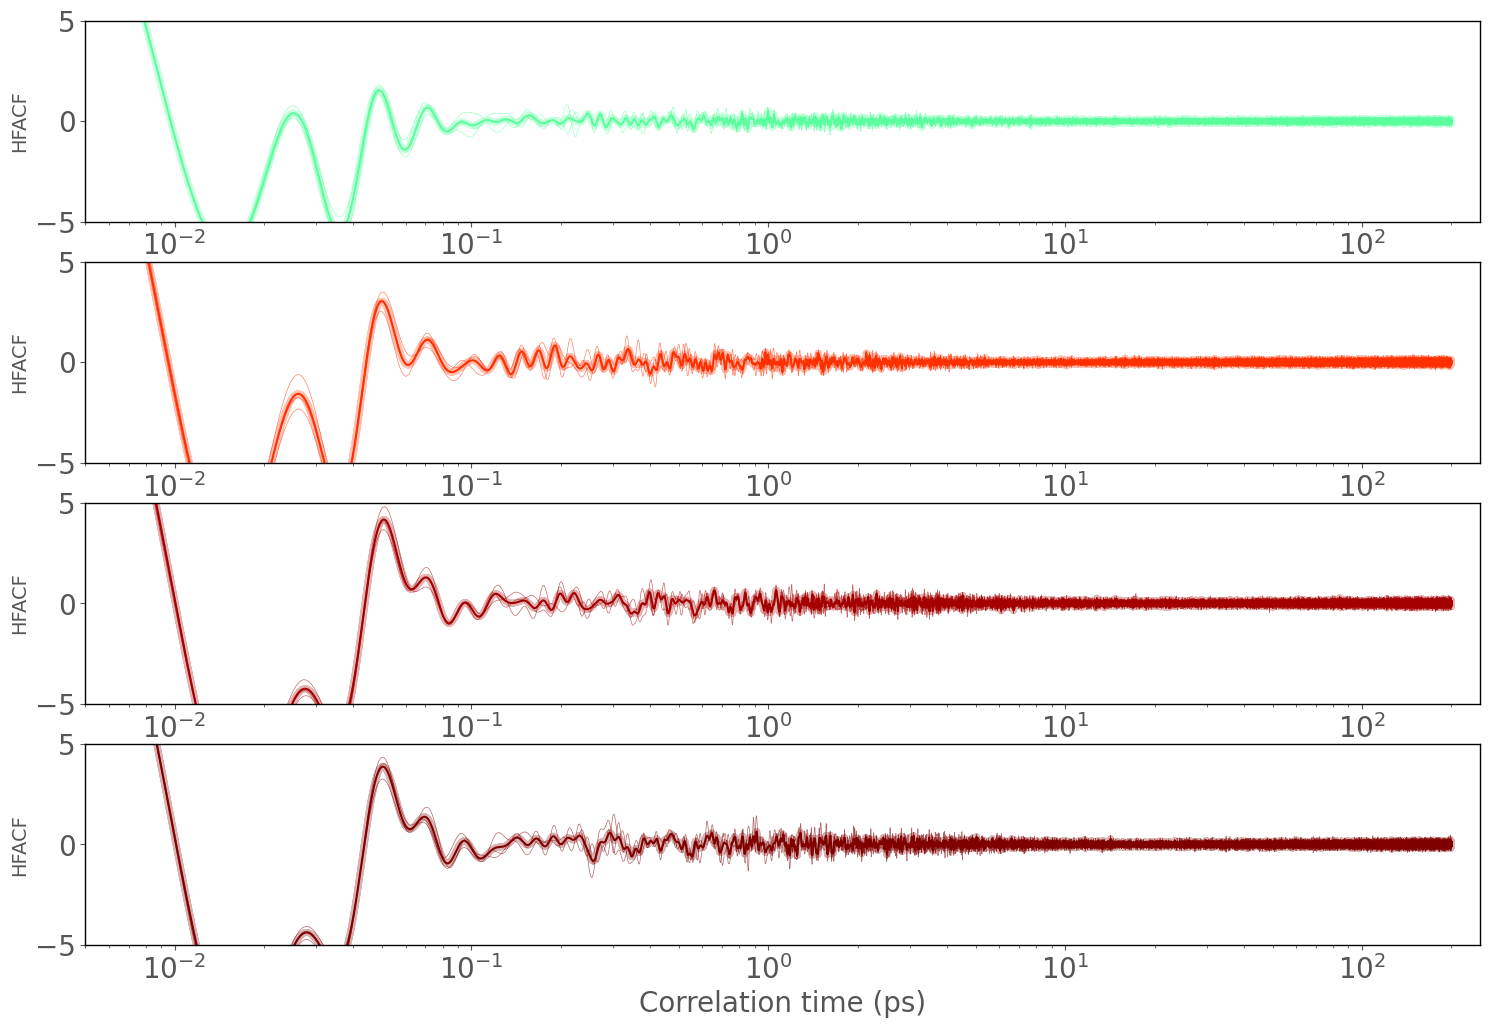

In [5]:
hac = np.load('../ta-c/generation_3/fullerite/plotdata/hac.npy')
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.2)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, :])
ax3 = fig.add_subplot(grid[2, :])
ax4 = fig.add_subplot(grid[3, :])
axes = [ax1, ax2, ax3, ax4]
dnorms = Normalize(vmin=2, vmax=fullerite['den'].max())
jet = cm.get_cmap('jet')

#dnorms = Normalize(vmin=2, vmax=fullerite['den'].max())
#jet = cm.get_cmap('jet')
#divider = make_axes_locatable(ax1)
#cax = divider.new_horizontal(size='5%', pad=0.8, pack_start=False)
#cax.yaxis.set_label_position('right')
#cax.yaxis.tick_right()
#fig.add_axes(cax)
#fig.colorbar(cm.ScalarMappable(norm=dnorms, cmap=jet), cax=cax)
#cax.set_xticks([])
#cax.set_yticks([2.0, 2.5, 3.0, 3.5])
#cax.set_ylabel('Density (g/cm3)')

for ax, model in zip(axes, hac):
    color = jet(dnorms(model['density']))
    stdhac = model['stdhac']
    meanhac = model['meanhac']
    hacbar = meanhac.mean(axis=-1)
    hp = hacbar+stdhac
    hm = hacbar-stdhac
    tau = np.arange(stdhac.size) * model['dtfs'] / 1000
    
    ax.plot(tau, meanhac[:, 0], color=color, alpha=0.6, linewidth=0.5)
    ax.plot(tau, meanhac[:, 1], color=color, alpha=0.6, linewidth=0.5)
    ax.plot(tau, meanhac[:, 2], color=color, alpha=0.6, linewidth=0.5)
    ax.plot(tau, hacbar, color=color, alpha=1)
    #ax.plot(tau, hp, color=color, alpha=0.8)
    #ax.plot(tau, hm, color=color, alpha=0.8)
    ax.fill_between(tau, hm, hp, color=color, alpha=0.3)

for ax in axes:
    ax.set_ylim([-5, 5])
    ax.set_xlim([5e-3, 250])
    ax.set_xscale('log')
    ax.set_ylabel('HFACF', fontsize=14)

ax4.set_xlabel('Correlation time (ps)')

0.0 2.9007785717557725e-15


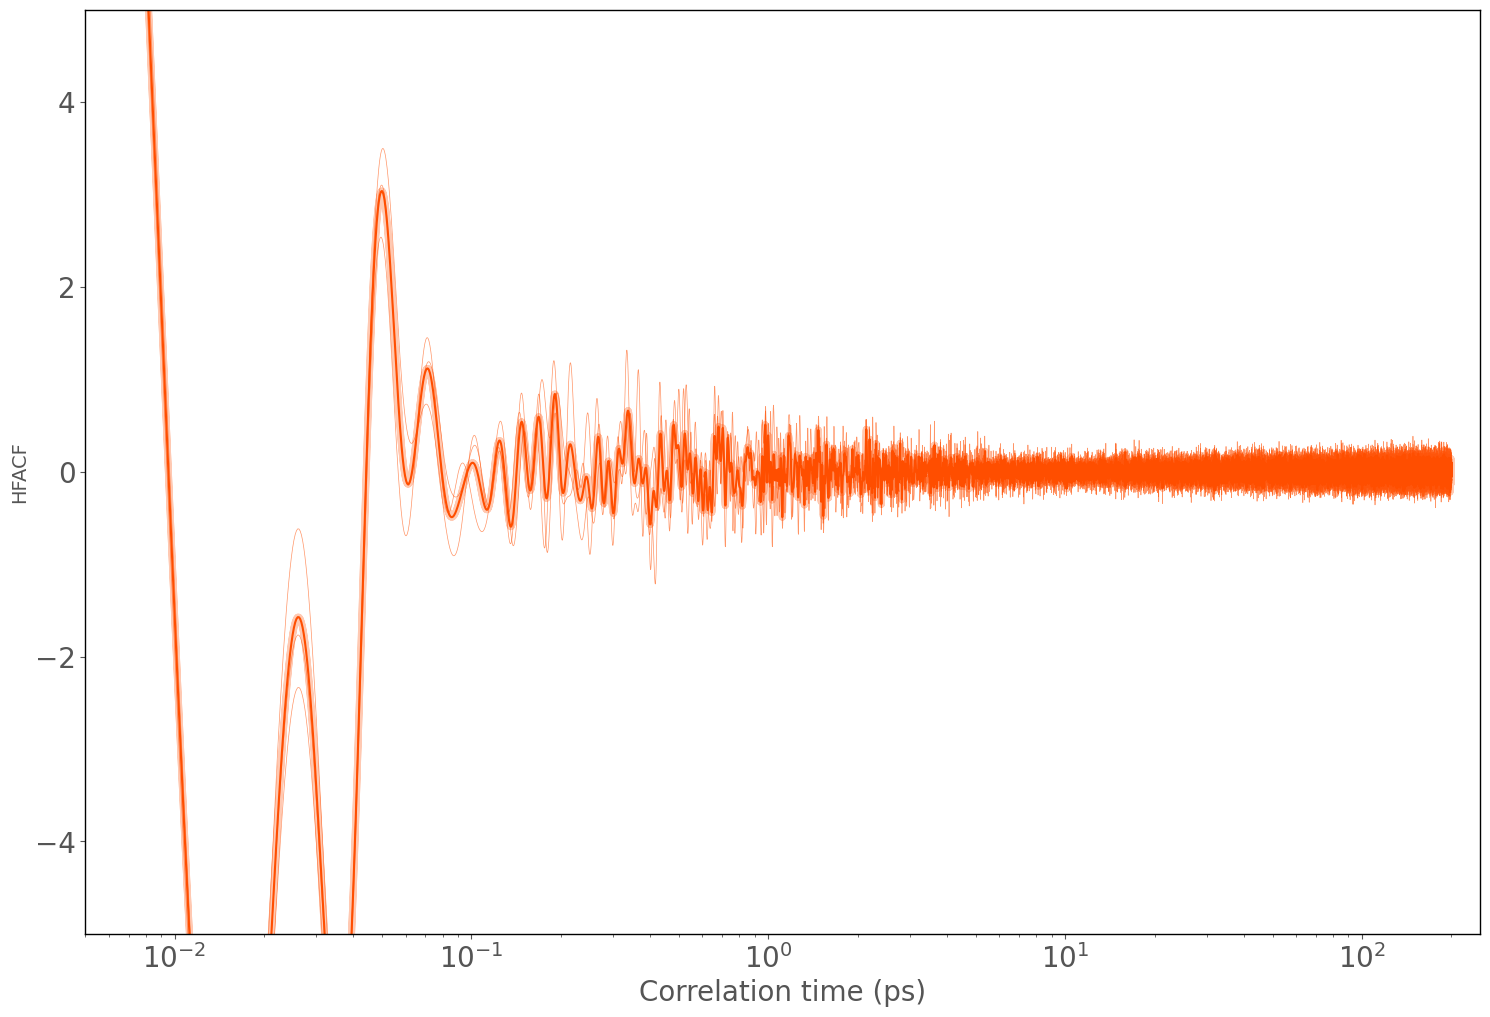

In [16]:
model = np.load('../ta-c/generation_3/fullerite/plotdata/hac.npy')[1]
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.2)
ax = fig.add_subplot(grid[:, :])
dnorms = Normalize(vmin=2, vmax=3.5)
jet = matplotlib.colormaps.get_cmap('jet')


color = jet(dnorms(model['density']))
#stdhac = model['stdhac']
meanhac = model['meanhac']
hacbar = meanhac.mean(axis=-1)
#hp = hacbar+stdhac
hm = hacbar-stdhac
tau = np.arange(stdhac.size) * model['dtfs'] / 1000
    
ax.plot(tau, meanhac[:, 0], color=color, alpha=0.6, linewidth=0.5)
ax.plot(tau, meanhac[:, 1], color=color, alpha=0.6, linewidth=0.5)
ax.plot(tau, meanhac[:, 2], color=color, alpha=0.6, linewidth=0.5)
ax.plot(tau, hacbar, color=color, alpha=1)
ax.fill_between(tau, hm, hp, color=color, alpha=0.3)

ax.set_ylim([-5, 5])
ax.set_xlim([5e-3, 250])
ax.set_xscale('log')
ax.set_ylabel('HFACF', fontsize=14)

ax.set_xlabel('Correlation time (ps)')

#print(stdhac.min(), stdhac.max())
ax = None; grid = None;
del ax, grid
fig = None; del fig; model = None; del model
hp = None; hm = None; hacbar = None; tau = None
meanhac, stdhac = None, None
del meanhac, stdhac, hp, hm, hacbar, tau

/tmp/ipykernel_36542/933976354.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')


Text(0.5, 0, 'Correlation time (ps)')

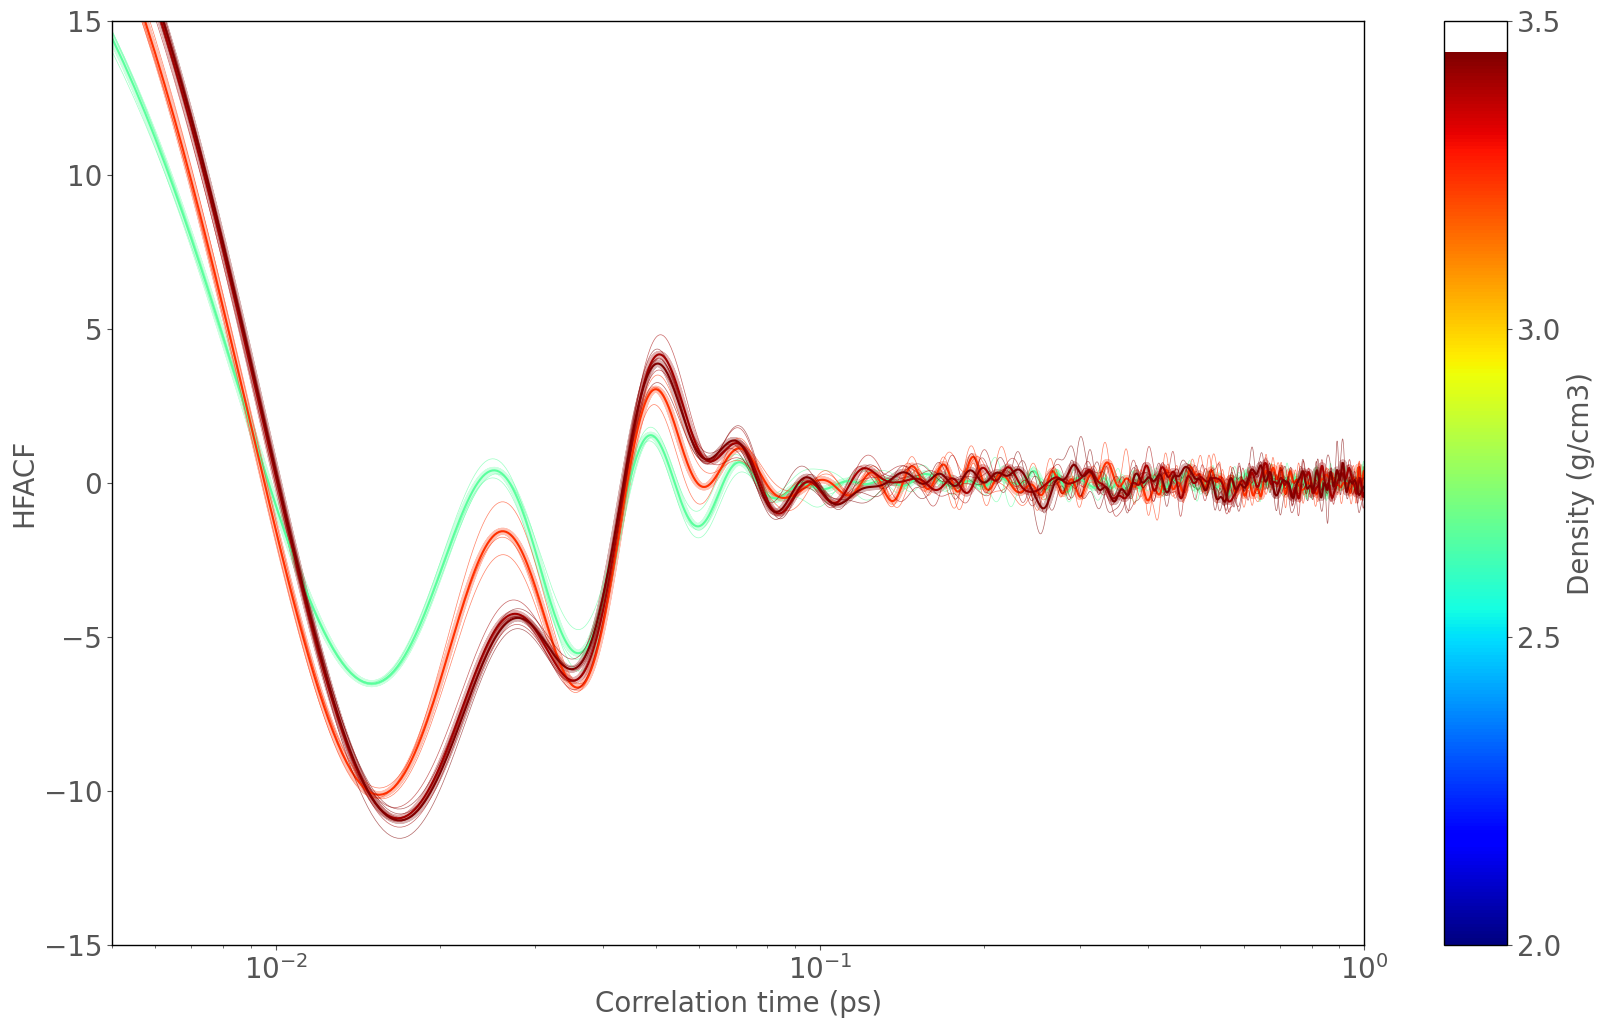

In [10]:
hac = np.load('../ta-c/generation_3/fullerite/plotdata/hac.npy')
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

dnorms = Normalize(vmin=2, vmax=fullerite['den'].max())
jet = cm.get_cmap('jet')
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.8, pack_start=False)
cax.yaxis.set_label_position('right')
cax.yaxis.tick_right()
fig.add_axes(cax)
fig.colorbar(cm.ScalarMappable(norm=dnorms, cmap=jet), cax=cax)
cax.set_xticks([])
cax.set_yticks([2.0, 2.5, 3.0, 3.5])
cax.set_ylabel('Density (g/cm3)')

for model in hac:
    color = jet(dnorms(model['density']))
    stdhac = model['stdhac']
    meanhac = model['meanhac']
    hacbar = meanhac.mean(axis=-1)
    hp = hacbar+stdhac
    hm = hacbar-stdhac
    tau = np.arange(stdhac.size) * model['dtfs'] / 1000

    ax.plot(tau, meanhac[:, 0], color=color, alpha=0.6, linewidth=0.5)
    ax.plot(tau, meanhac[:, 1], color=color, alpha=0.6, linewidth=0.5)
    ax.plot(tau, meanhac[:, 2], color=color, alpha=0.6, linewidth=0.5)
    ax.plot(tau, hacbar, color=color, alpha=1)
    ax.fill_between(tau, hm, hp, color=color, alpha=0.3)


ax.set_ylim([-15, 15])
ax.set_xlim([5e-3, 1])
ax.set_xscale('log')
ax.set_ylabel('HFACF', fontsize=20)

ax.set_xlabel('Correlation time (ps)', fontsize=20)

ta-C 2.19g/cm3 3.136, 0.049
ta-C 2.34g/cm3 3.311, 0.081
ta-C 2.51g/cm3 3.421, 0.116
ta-C 2.66g/cm3 3.614, 0.101
ta-C 2.81g/cm3 4.716, 0.095
ta-C 3.24g/cm3 5.788, 0.123
ta-C 3.38g/cm3 6.372, 0.078
ta-C 3.40g/cm3 6.470, 0.066
ta-C 3.41g/cm3 6.529, 0.139
ta-C 3.45g/cm3 6.877, 0.143
ta-C 3.45g/cm3 6.962, 0.076
ta-C 3.46g/cm3 6.868, 0.169


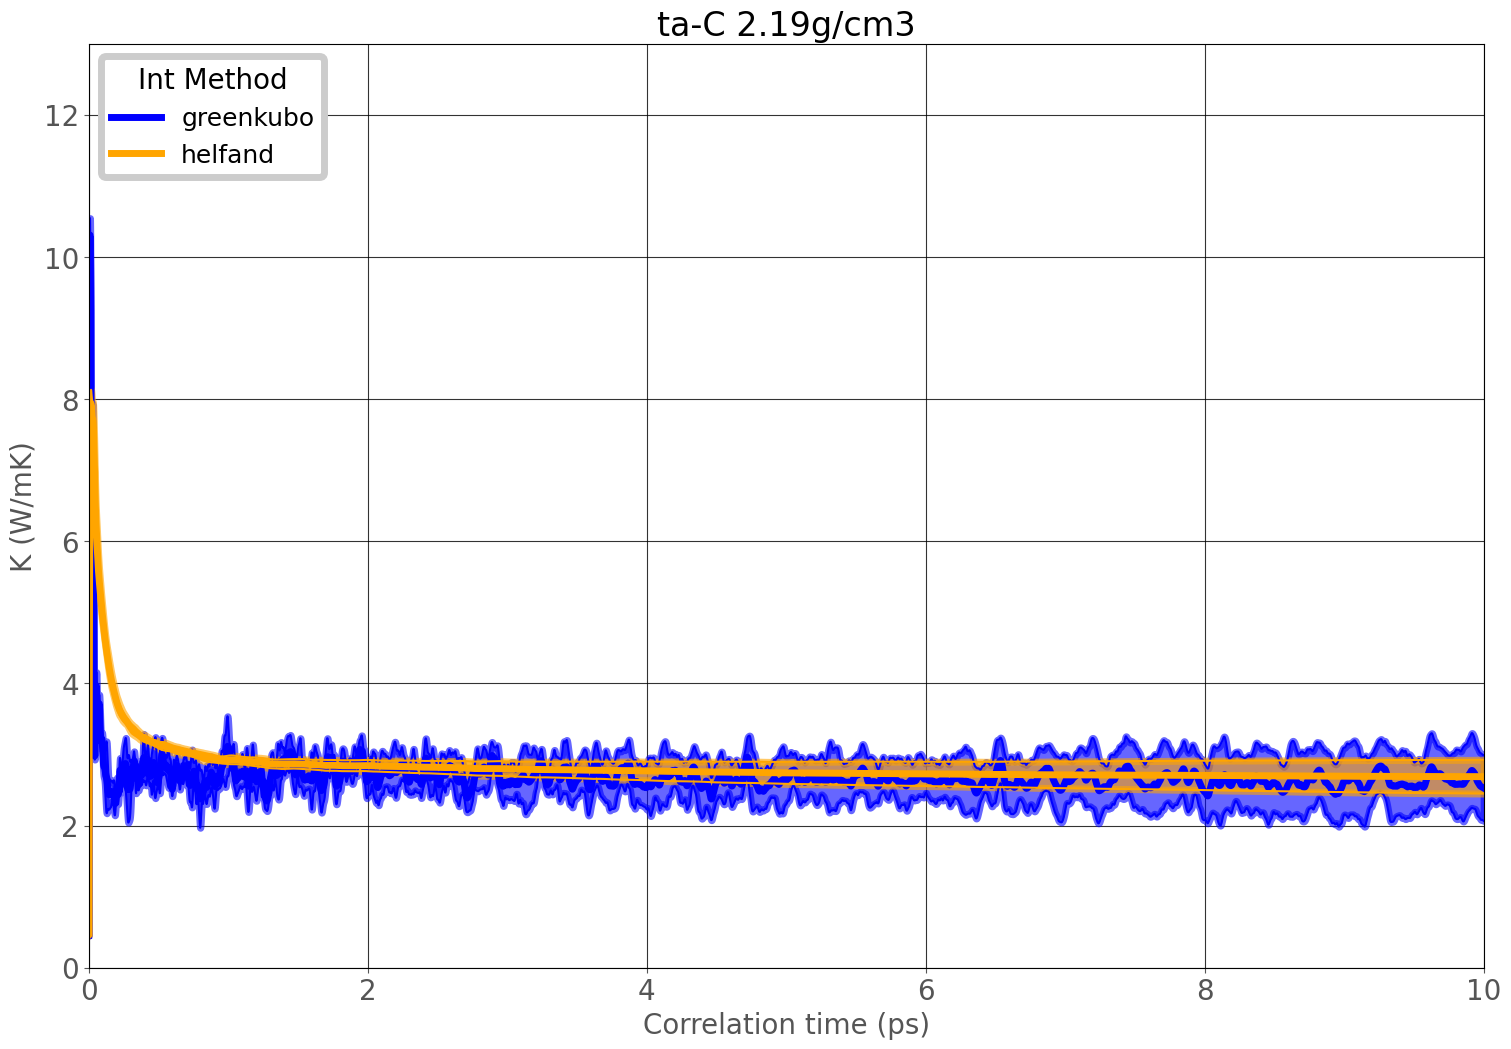

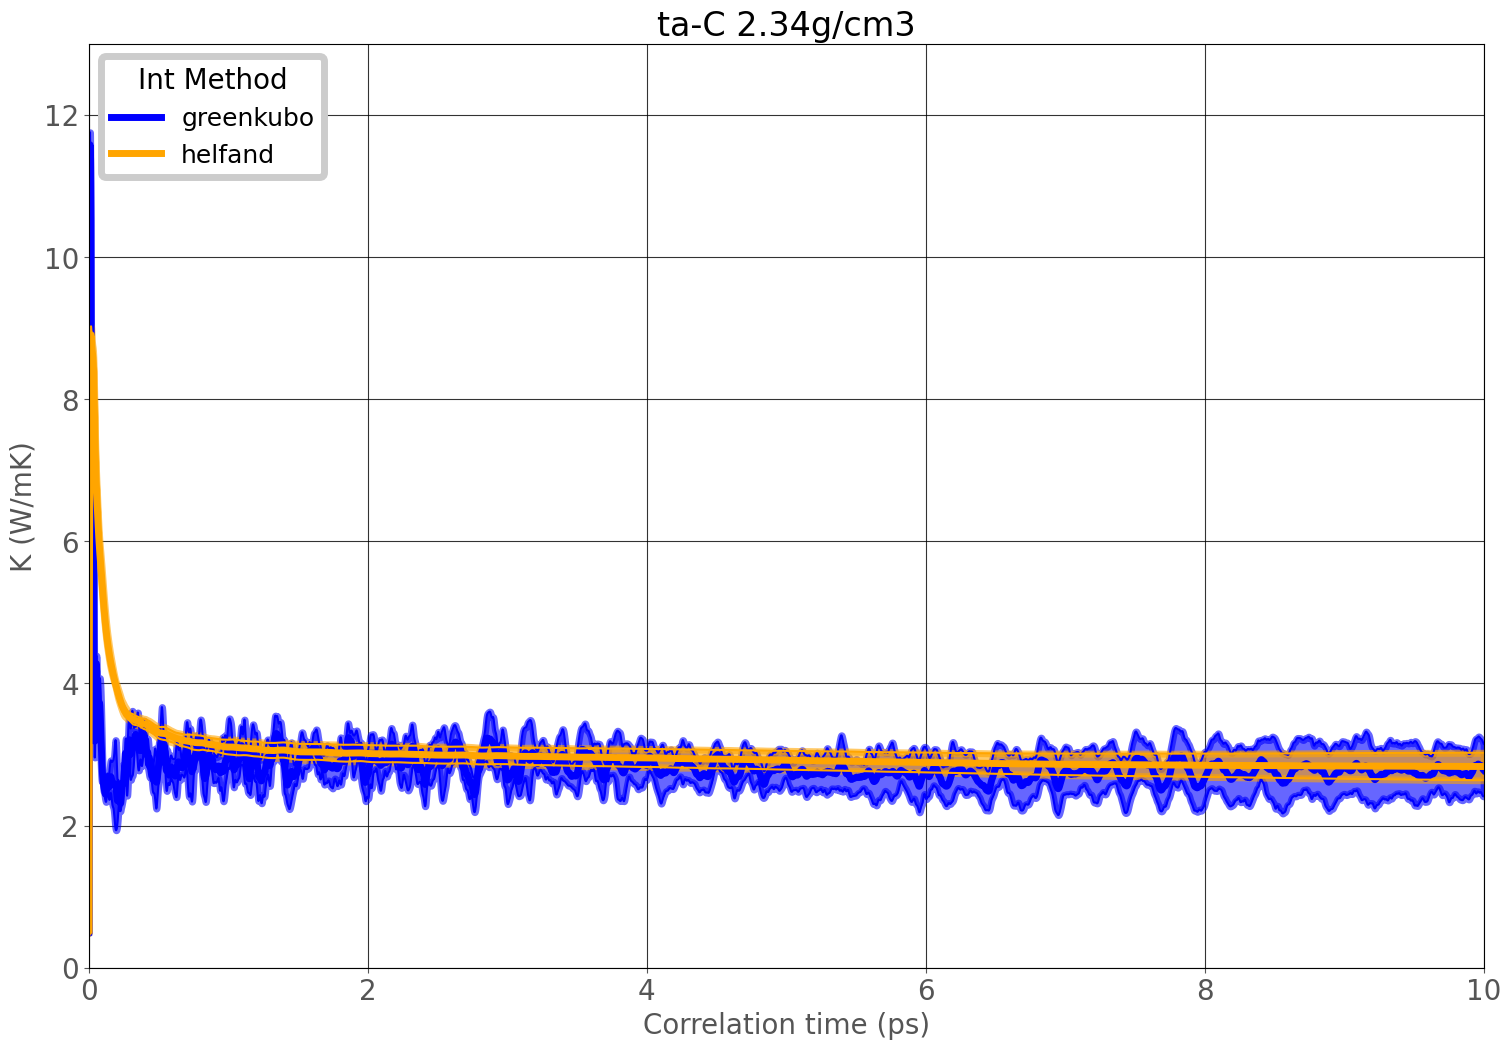

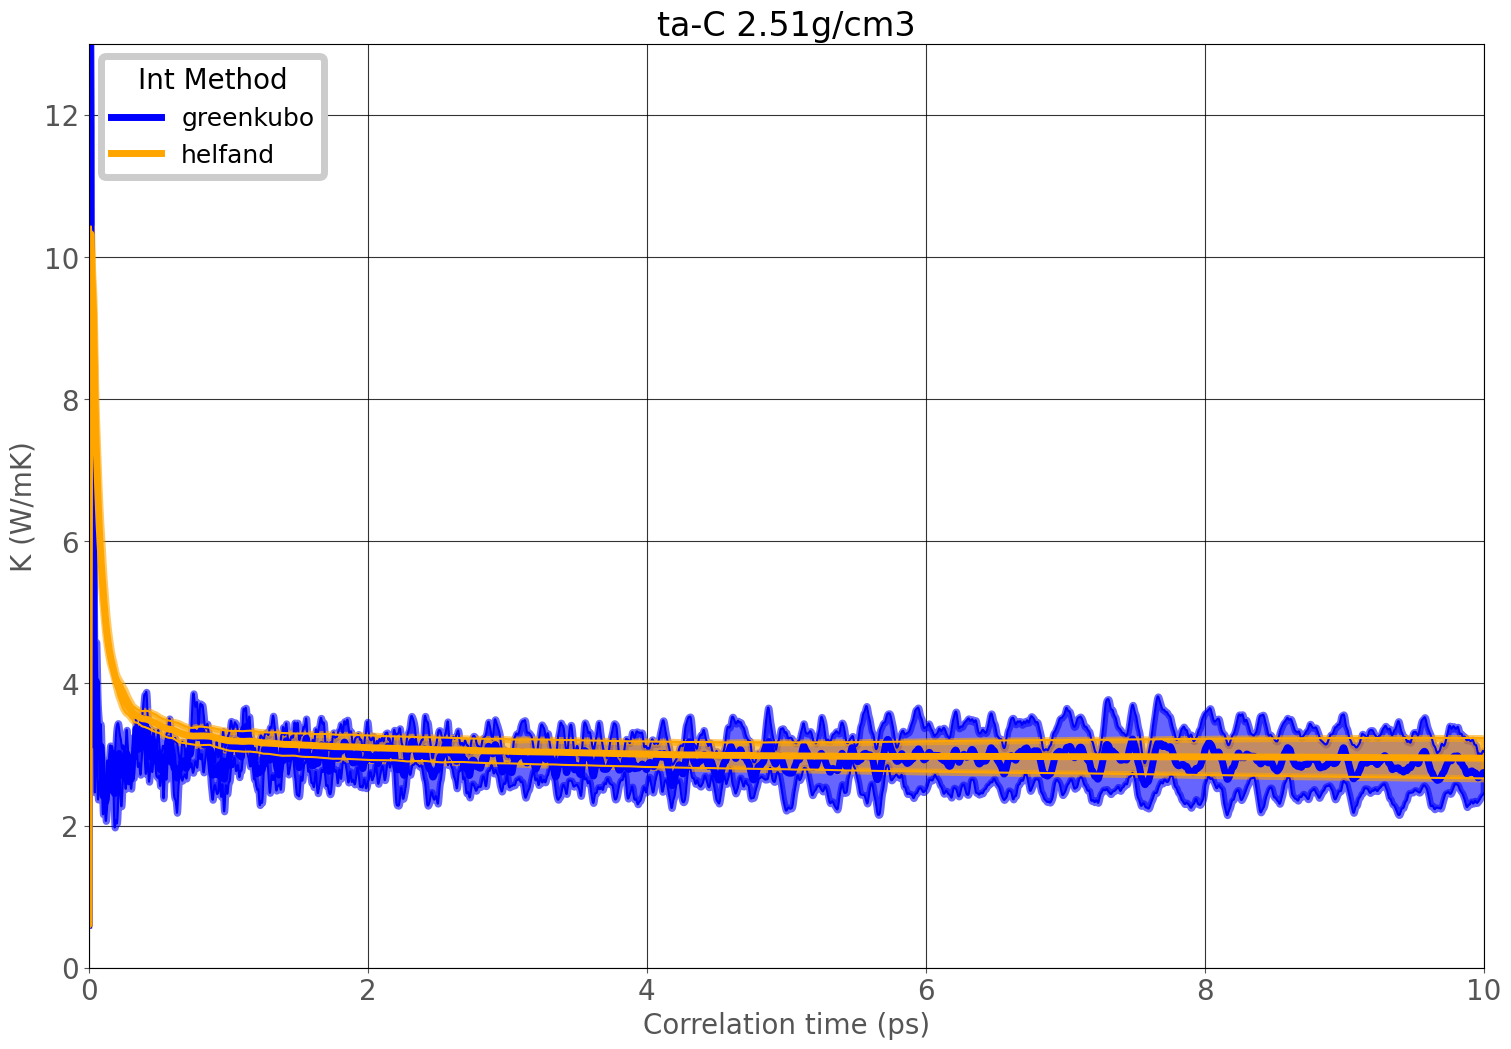

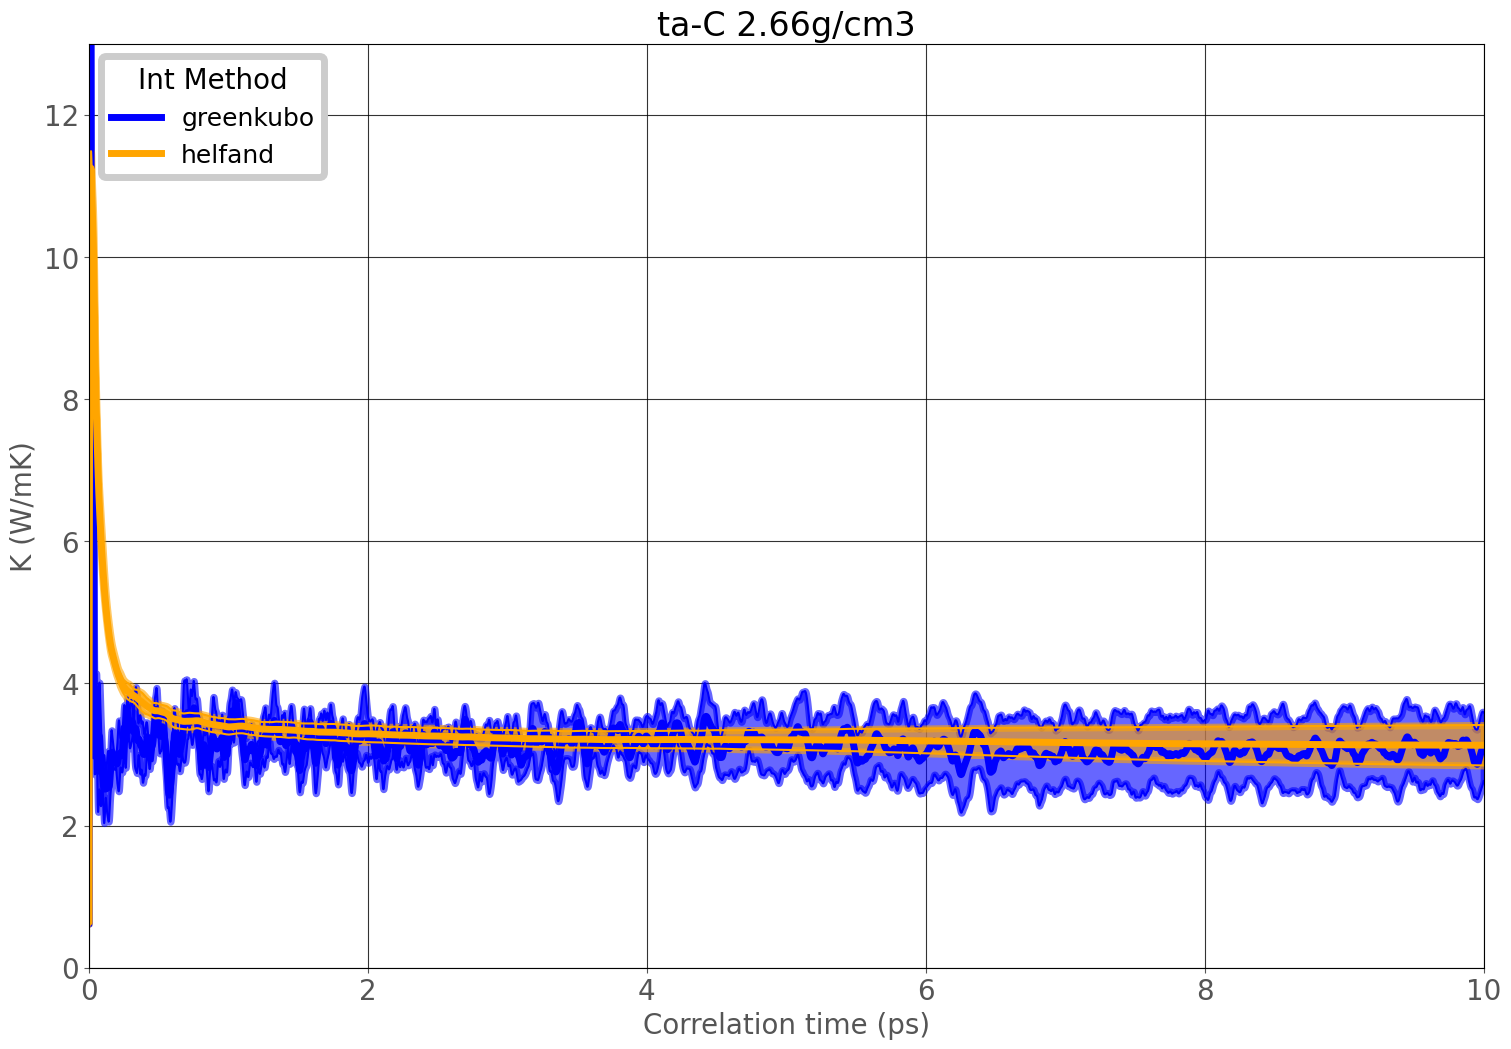

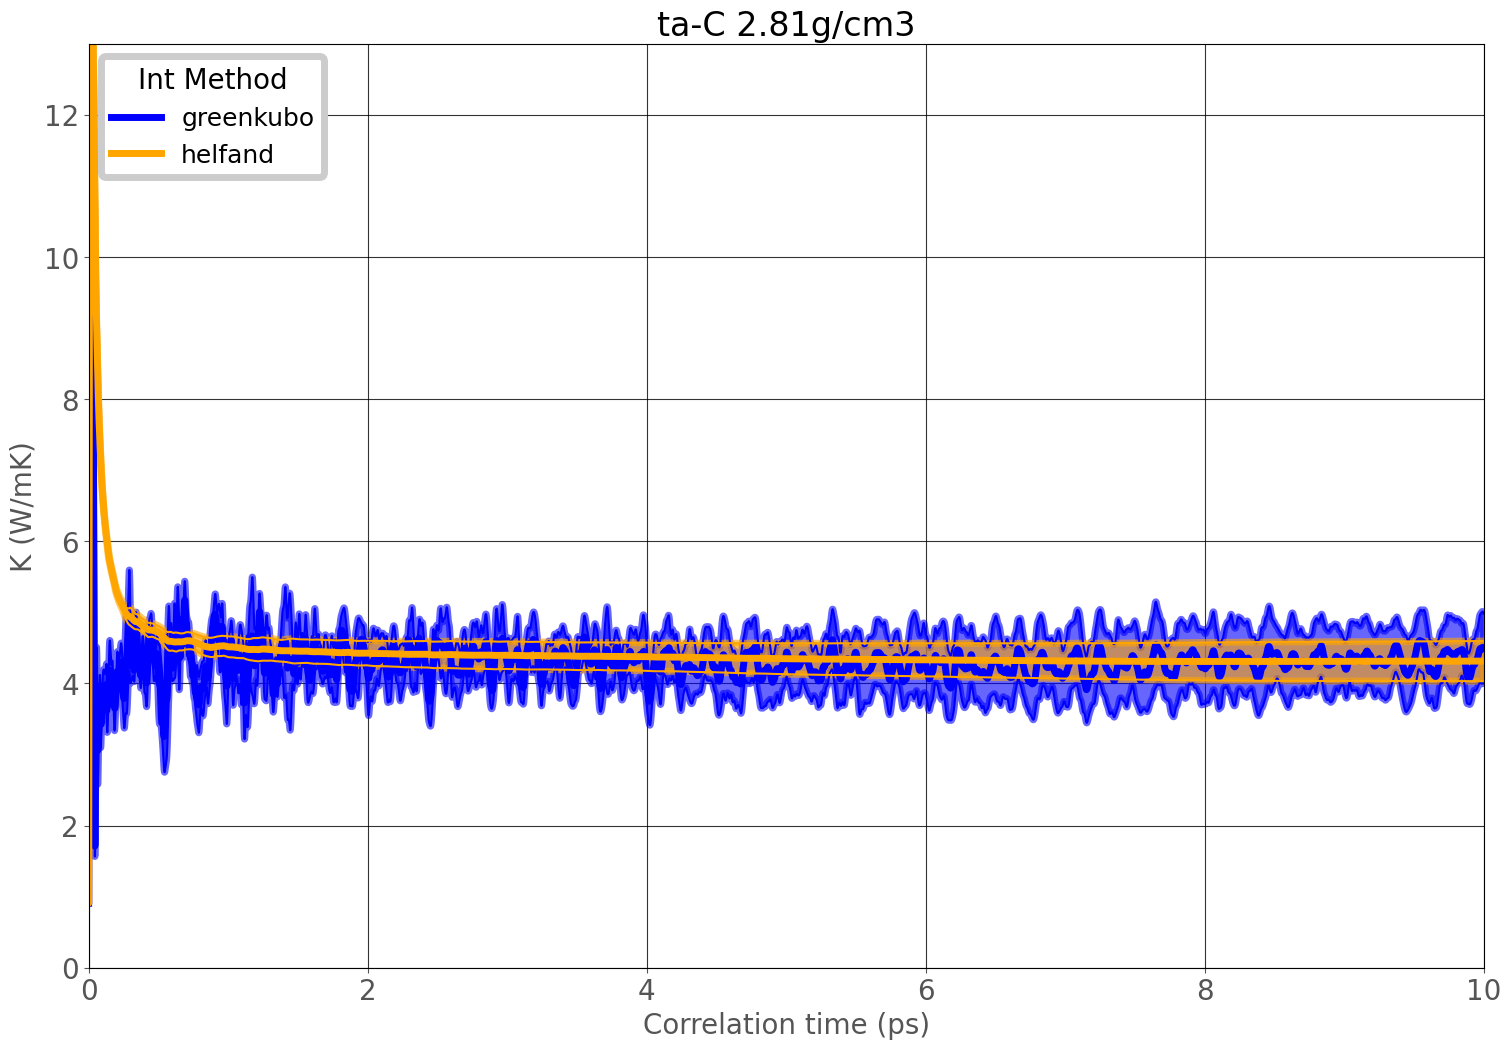

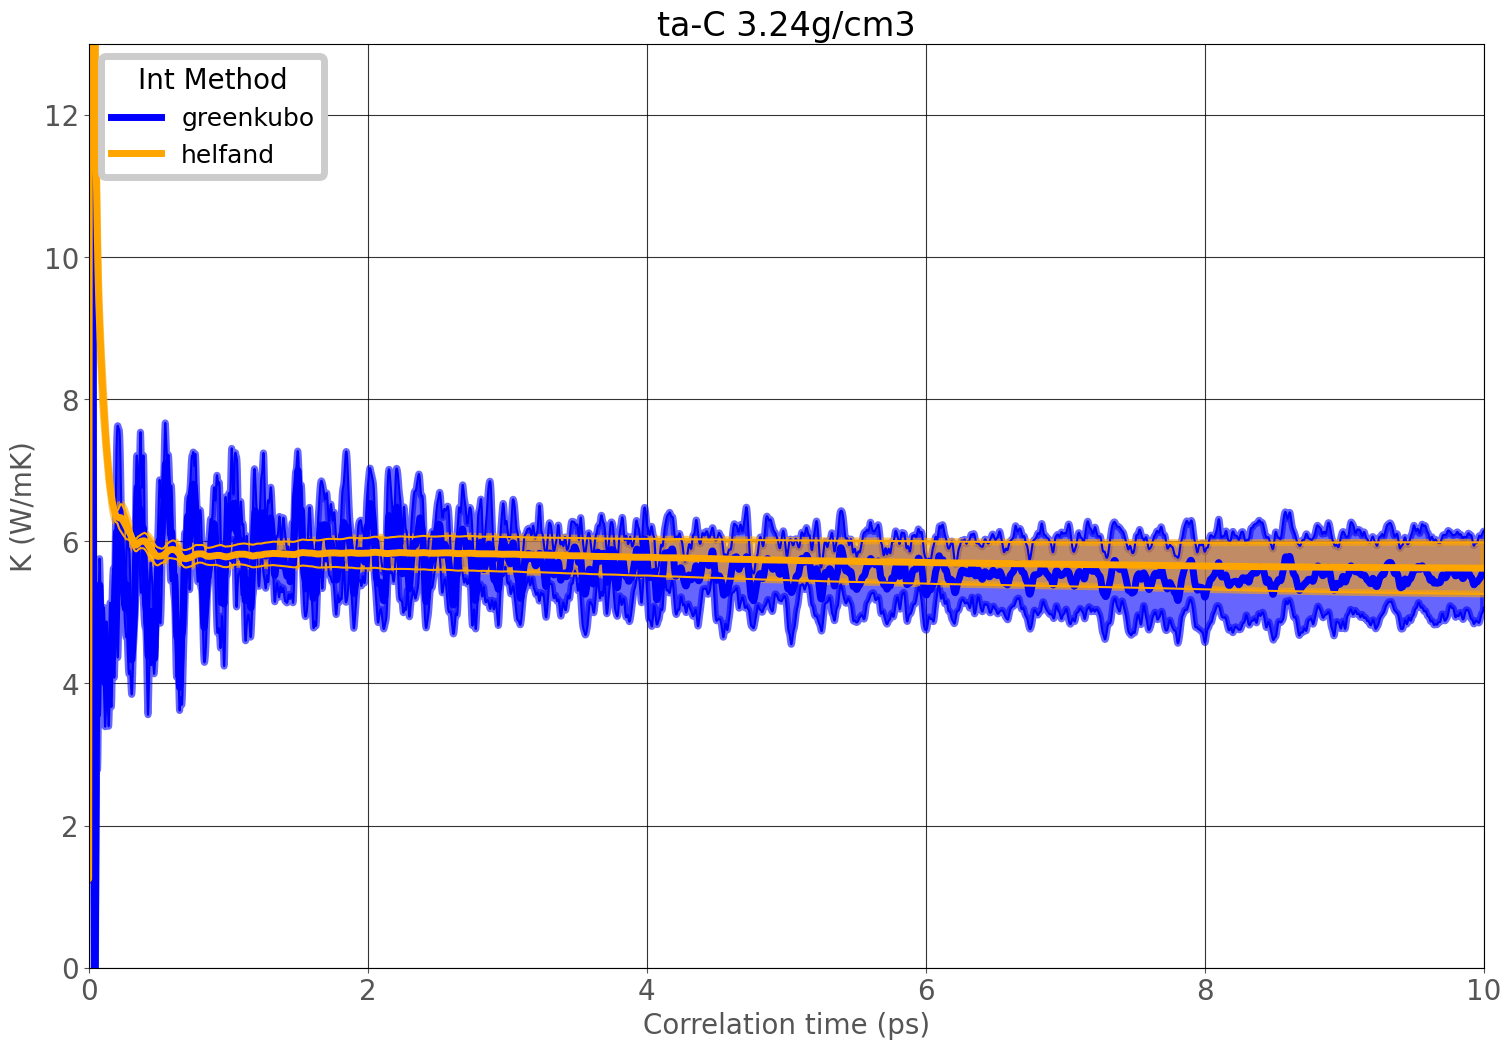

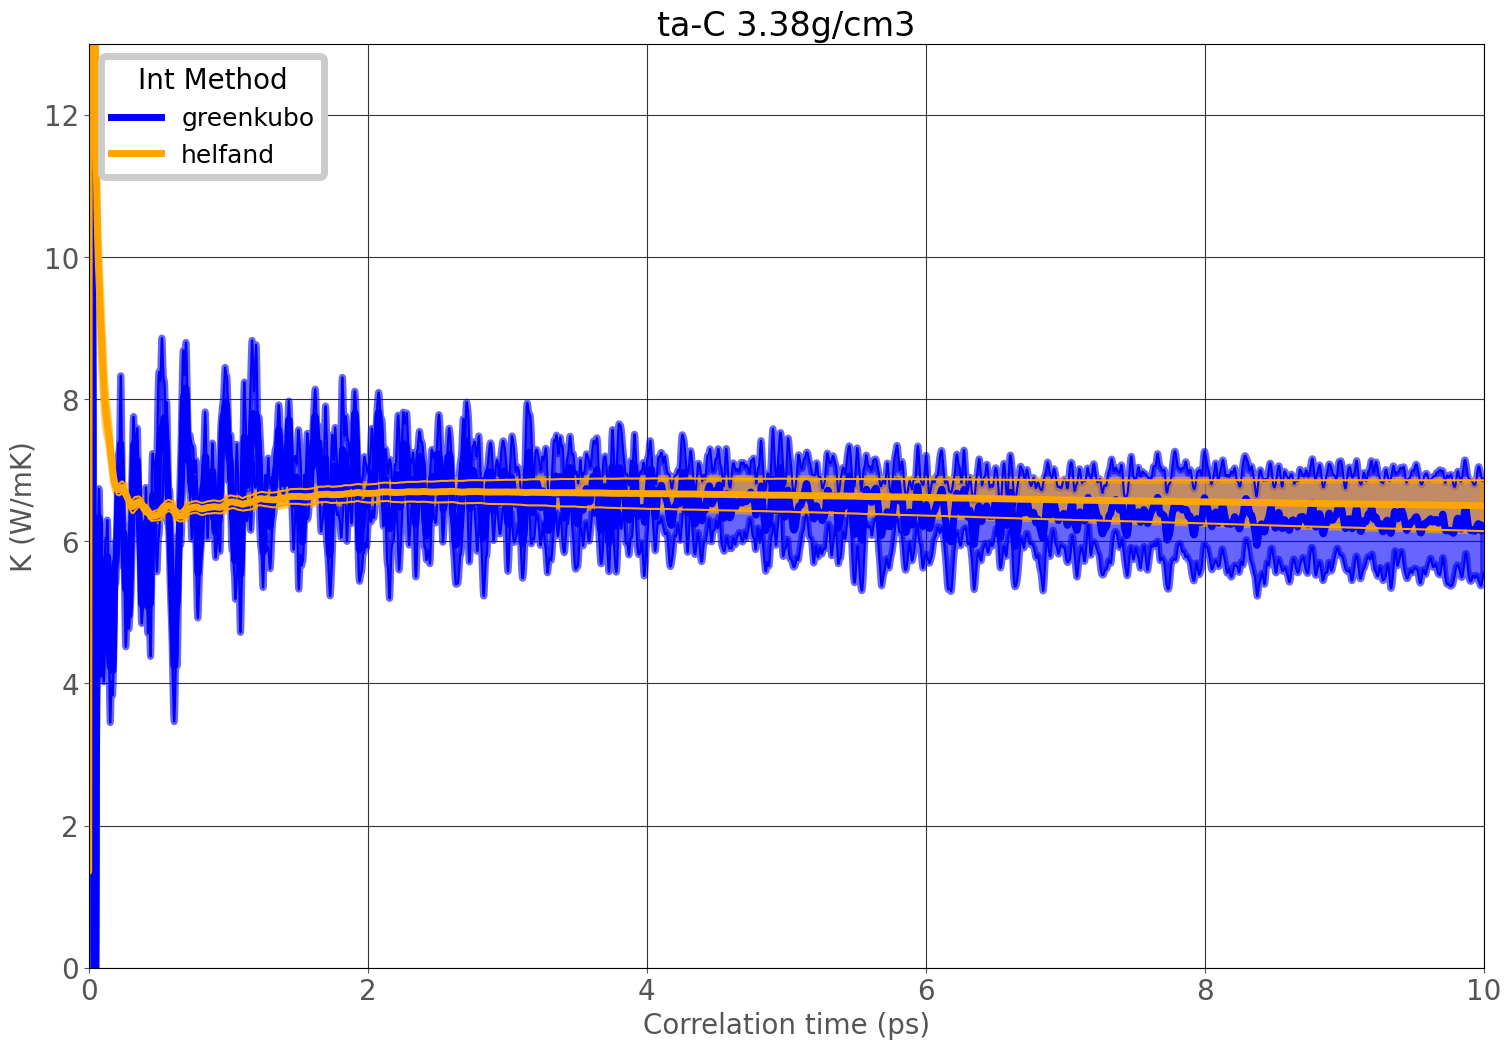

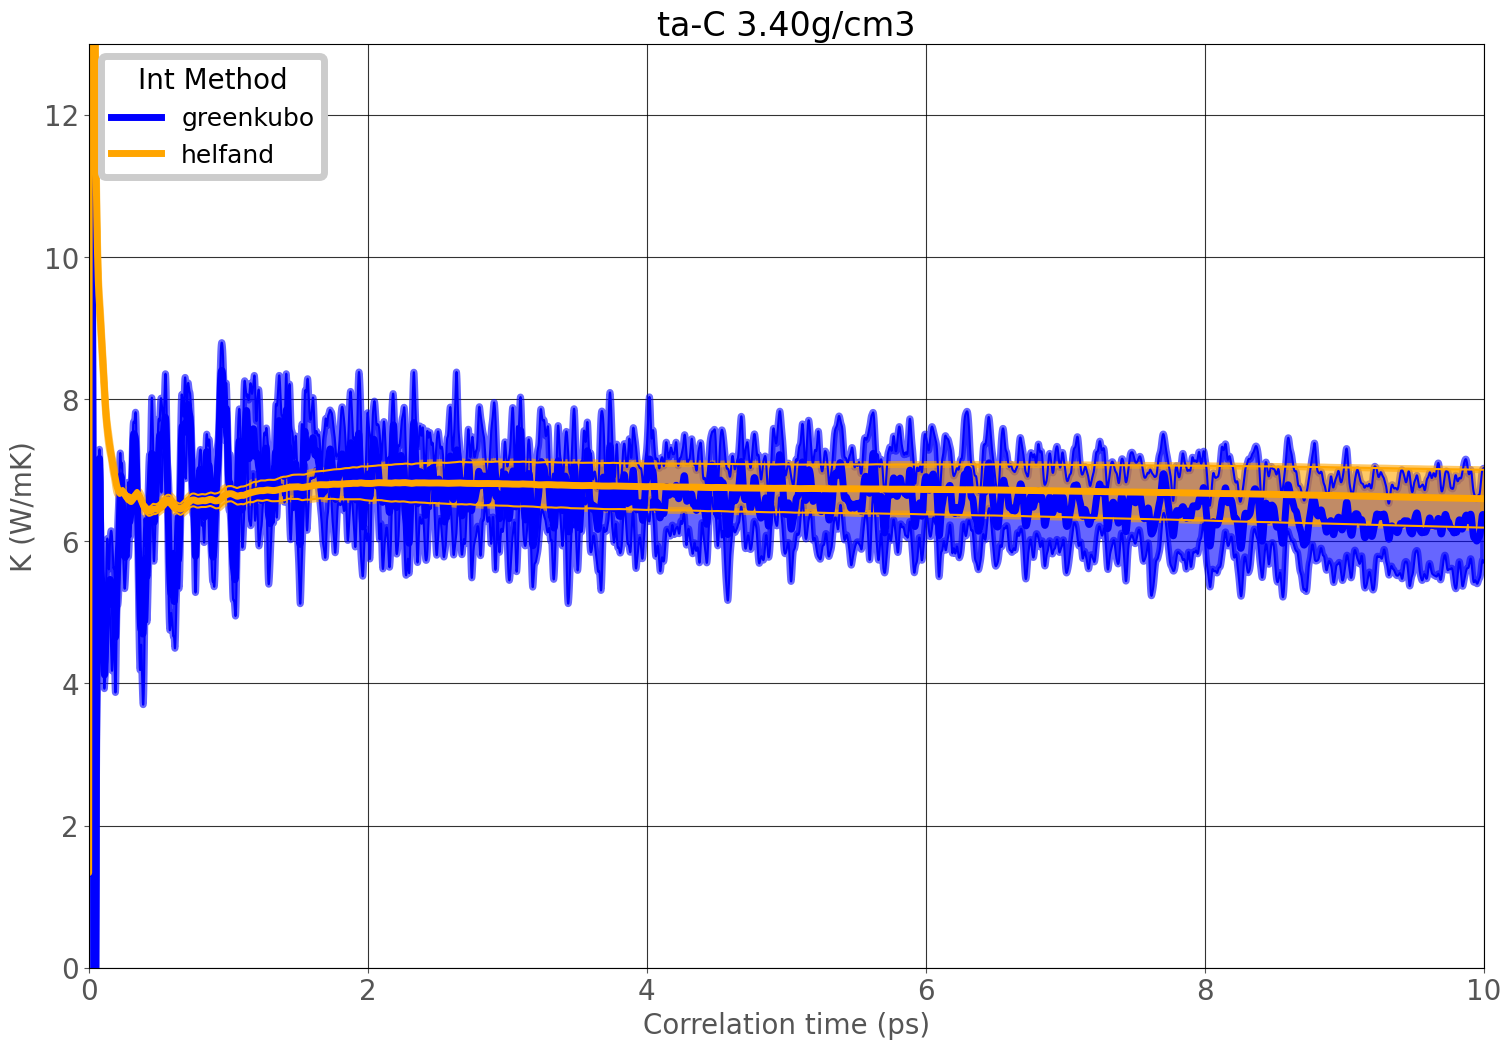

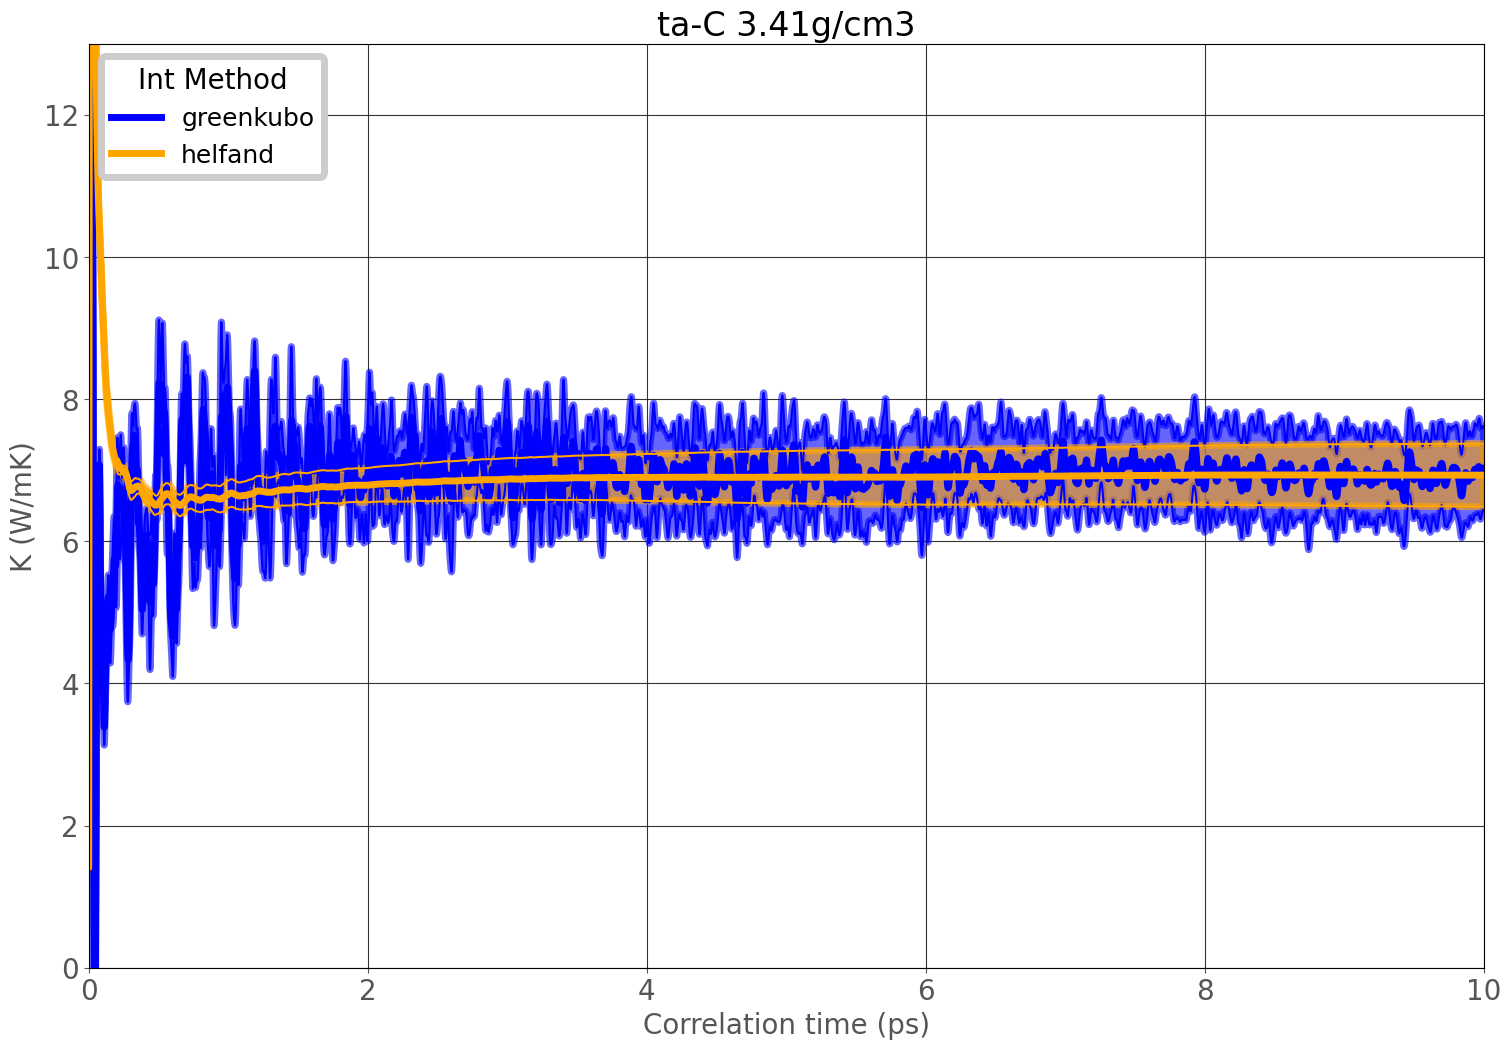

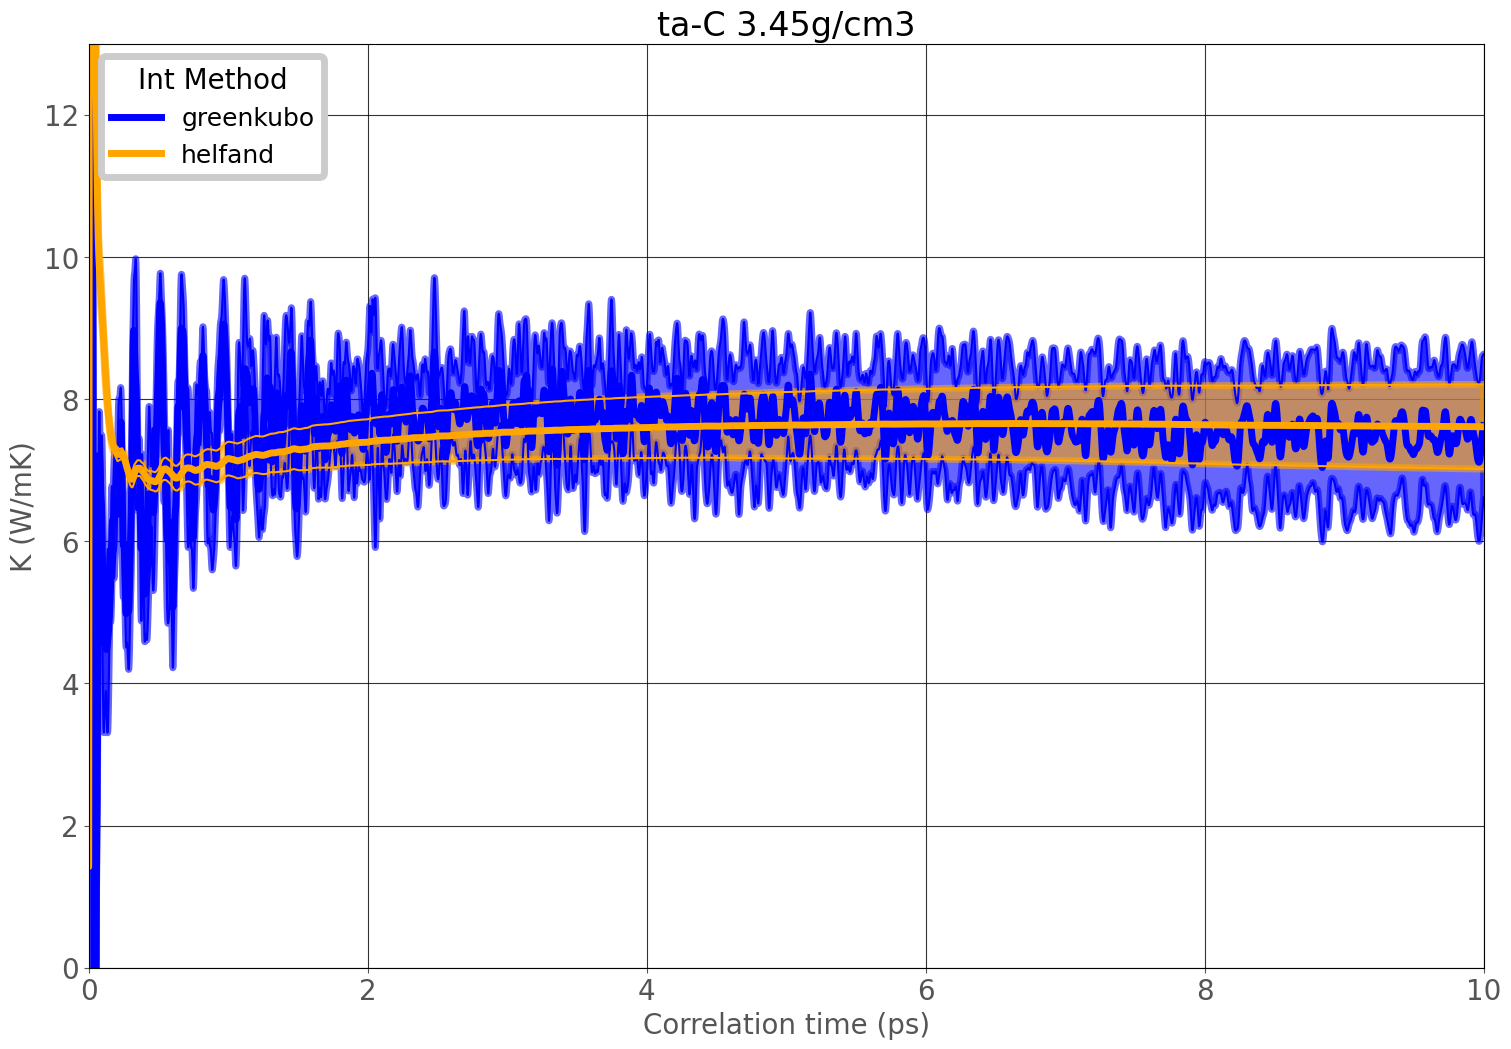

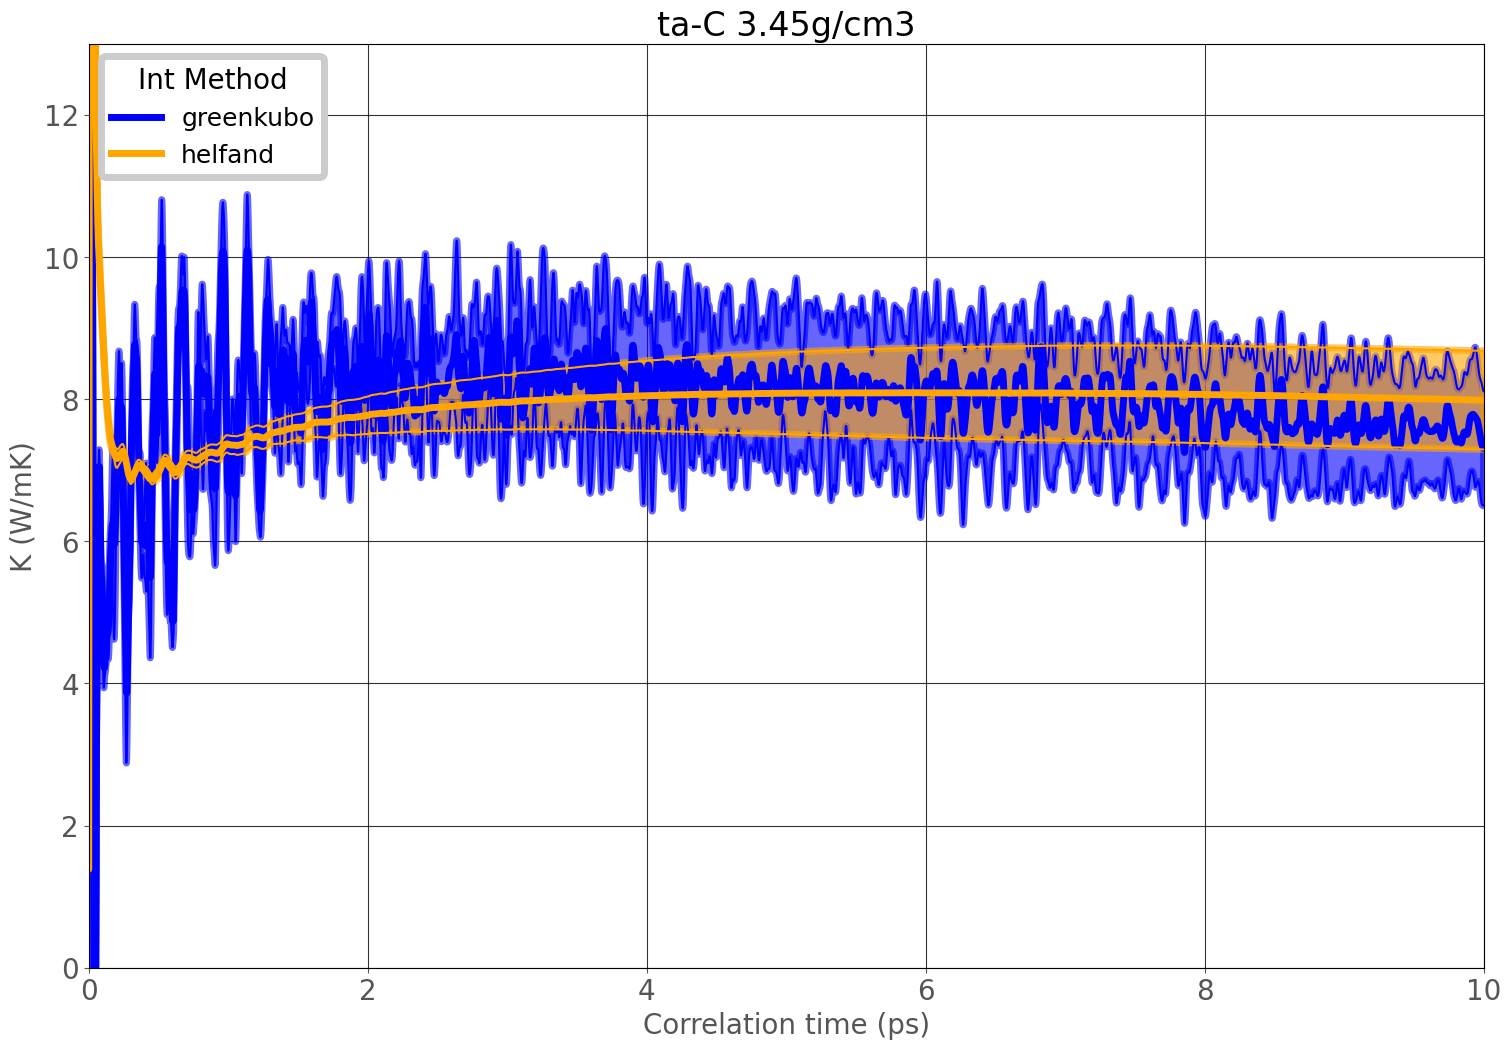

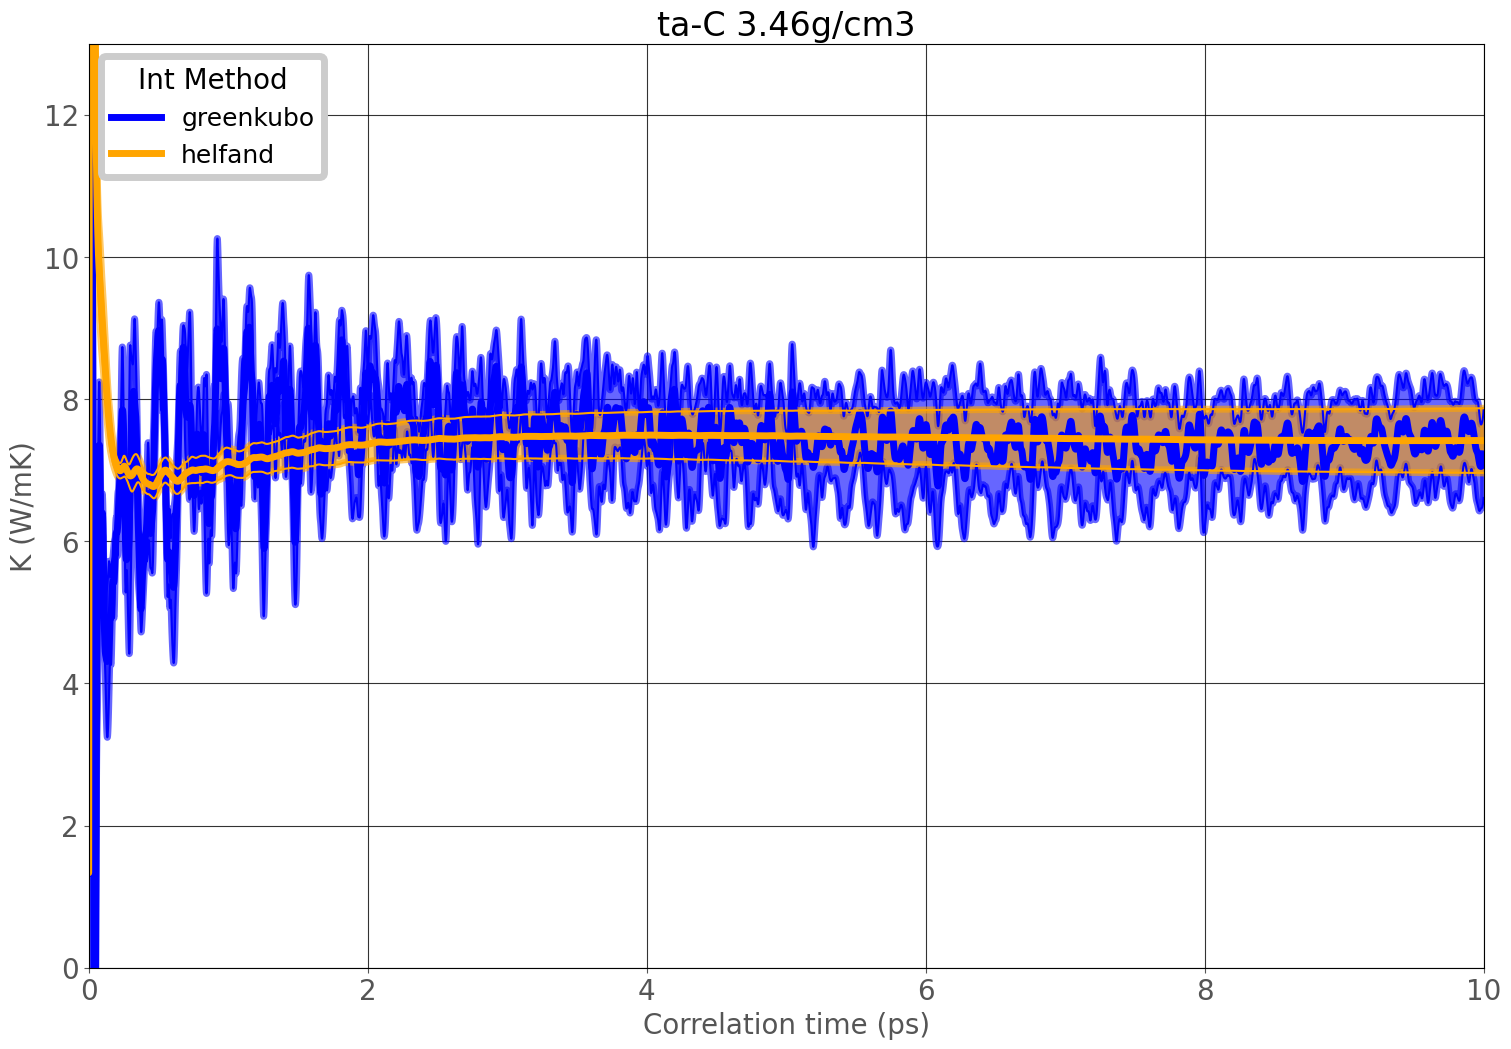

In [5]:
for imod in range(12):
    helf = np.load('../ta-c/generation_3/fullerite/plotdata/helfand.npy')[imod]
    gk = np.load('../ta-c/generation_3/fullerite/plotdata/greenkubo.npy')[imod]
    fig = plt.figure(figsize=(18, 12))
    grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
    ax = fig.add_subplot(grid[:, :])

    ### GREEN KUBO
    model = gk
    color = 'b'

    tau = model['tau']
    stdkap = model['std']
    meankap = model['kappa']
    kapbar = meankap.mean(axis=1)
    kp = kapbar+stdkap
    km = kapbar-stdkap



    # ax.plot(tau, meankap[:, 0], color=color, alpha=0.6, linewidth=0.4)
    # ax.plot(tau, meankap[:, 1], color=color, alpha=0.6, linewidth=0.4)
    # ax.plot(tau, meankap[:, 2], color=color, alpha=0.6, linewidth=0.4)
    ax.plot(tau, kapbar, color=color, alpha=1, linewidth=5, label='greenkubo')
    ax.plot(tau, kp, color=color, alpha=1)
    ax.plot(tau, km, color=color, alpha=1)
    ax.fill_between(tau, km, kp, color=color, alpha=0.6)

    ### HELFAND
    model = helf
    color = 'orange'
    stdkap = model['std']
    meankap = model['kappa']
    kapbar = meankap.mean(axis=1)
    kp = kapbar+stdkap
    km = kapbar-stdkap
    
    print(f'ta-C {model["density"]:.2f}g/cm3 {kapbar[2000]:.3f}, {stdkap[2000]:.3f}')

    # ax.plot(tau, meankap[:, 0], color=color, alpha=0.6, linewidth=0.4)
    # ax.plot(tau, meankap[:, 1], color=color, alpha=0.6, linewidth=0.4)
    # ax.plot(tau, meankap[:, 2], color=color, alpha=0.6, linewidth=0.4)
    ax.plot(tau, kapbar, color=color, alpha=1, linewidth=5, label='helfand')
    ax.plot(tau, kp, color=color, alpha=1)
    ax.plot(tau, km, color=color, alpha=1)
    ax.fill_between(tau, km, kp, color=color, alpha=0.6)

    ax.grid(color='k', alpha=0.8)

    ax.set_ylim([0, 13])

    ax.set_xlim([0, 10])
    ax.legend(loc='upper left', title='Int Method')
    ax.set_xlabel('Correlation time (ps)')
    ax.set_ylabel('K (W/mK)')
    ax.set_title(f'ta-C {model["density"]:.2f}g/cm3')
    plt.savefig(f'../ta-c/generation_3/fullerite/figures/kappa{imod}.png')

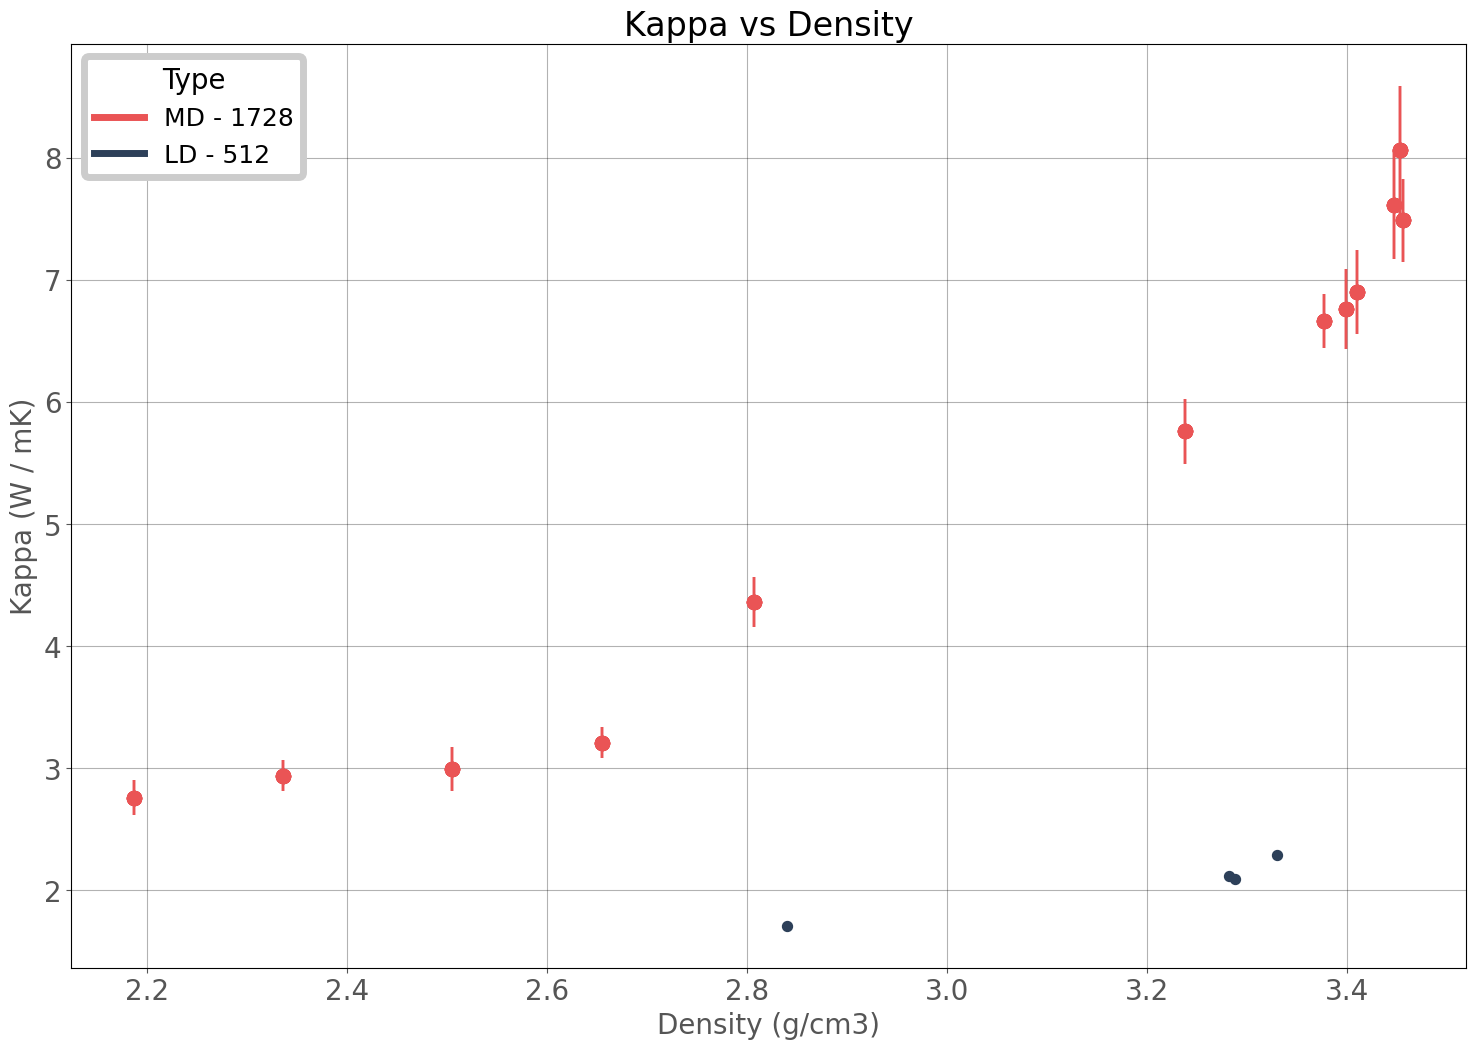

In [43]:
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

red = styles['annealedquench']['scattercor']
blue = styles['fullerite']['scattercor']

helf = np.load('../ta-c/generation_3/fullerite/plotdata/helfand.npy')
#dens = [model['sp3'] for model in helf]
dens = [model['density'] for model in helf]
ks = [model['kappa'][15000:20000].mean() for model in helf]
std = [model['std'][15000:20000].mean() for model in helf]

for i in range(helf.size):
    ax.errorbar(dens, ks, yerr=std, color=red, marker='o', markersize=10, linestyle='none')

p = [9, 12, 15, 18]
d = [2.84, 3.288, 3.282, 3.33]
k = [1.71, 2.09, 2.12, 2.2887]
ax.scatter(d, k, color=blue, marker='o', s=10)

ax.set_title(r'Kappa vs Density')
ax.set_ylabel('Kappa (W / mK)')
ax.set_xlabel('Density (g/cm3)')

#ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
#ax.set_xticks([2, 2.25, 2.5, 2.75, 3, 3.25, 3.5])
#ax.set_xlim([2, 3.5])

md = plt.Line2D([],[], color=red, linewidth=5)
ld = plt.Line2D([],[], color=blue, linewidth=5)
ax.legend([md,ld], ['MD - 1728', 'LD - 512'], fontsize=18, title='Type', loc='upper left')
ax.grid(axis='both', color='k', alpha=0.3)
   

In [12]:
from sklearn.neighbors import KernelDensity
fullerite = np.load('../ta-c/generation_3/fullerite/plotdata/dos.npy')[2]
ald = np.load('../ta-c/generation_3/fullerite/plotdata/18gpa-frequency.npy')
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
ax = fig.add_subplot(grid[:, :])

npoints=500
kde = KernelDensity(kernel='gaussian', bandwidth=1/4.135).fit(ald.reshape(-1, 1))
x = np.linspace(0, ald.max(), npoints)
y = np.exp(kde.score_samples(x.reshape((-1, 1))))

w = fullerite['w']
dos = fullerite['totaldos'].mean(axis=1)
ax.plot(w, dos/1920, color='r', label='Molecular Dynamics')
ax.plot(x, y, color='b', label='Lattice Dynamics')

ax.grid(color='k', alpha=0.8)
ax.set_xlim([0, 60])
ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 0.01, 0.02, 0.03,], [0, 0.25, 0.5, 0.75])
ax.legend(loc='upper left', title='Method')
ax.set_xlabel('frequency (THz)')
ax.set_ylabel('DoS')
ax.set_title('ta-C 3.24g/cm3')

FileNotFoundError: [Errno 2] No such file or directory: '../ta-c/generation_3/fullerite/plotdata/18gpa-frequency.npy'

In [13]:
helf = np.load('../ta-c/generation_3/fullerite/plotdata/helfand.npy')[imod]

fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(grid[:, :])

red = styles['annealedquench']['scattercor']

ax1.set_title(r'Coordination v Density')
ax1.scatter(helf['', color=blue, marker='o', label='Fullerite')
ax1.scatter(annquench['den'], annquench['sp3'], color=red, marker='o', label='Melt Quench',)
ax1.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax1.set_xticks([2, 2.25, 2.5, 2.75, 3, 3.25, 3.5])
ax1.set_xlim([2, 3.5])
ax1.grid(axis='both', color='k', alpha=0.3)
ax1.legend(title='Type')

ax2.set_ylabel('sp2 ratio')
ax2.scatter(fullerite['den'], fullerite['sp2'], color=blue, marker='o', )
ax2.scatter(annquench['den'], annquench['sp2'], color=red, marker='o', label='Melt Quench',)
ax2.set_yticks([0.2, 0.4, 0.6, 0.8,])
ax2.set_xticks([2, 2.5, 3, 3.5])
ax2.set_xlim([2, 3.5])
ax2.grid(axis='both', color='k', alpha=0.3)

ax3.set_xlabel('Density (g/cm3)')
ax3.set_ylabel('# sp')
ax3.scatter(fullerite['den'], fullerite['sp']*1920, color=blue, marker='o', )
ax3.scatter(annquench['den'], annquench['sp']*1728, color=red, marker='o', label='Melt Quench',)
ax3.set_xticks([2, 2.5, 3, 3.5])
ax3.set_xlim([2, 3.5])
ax3.set_ylim([0, 25])
ax3.grid(axis='both', color='k', alpha=0.3)

ax3 = None; ax2 = None; ax1 = None; grid = None;
del ax3; del ax2; del ax1; del grid
fig = None; del fig
annealedquench, fullerite = None, None
del annealedquench, fullerite

SyntaxError: invalid syntax (2872052379.py, line 10)

In [38]:
color = ["#4285F4", "#34A853", "#FBBC05", "#EA4335"]
pressure = []; frequency = []; dos = []; velocity = [];
participation = []; bandwidth = []; conductivity = []

for p in [9, 12, 15, 18]:
    prepath = '../ta-c/generation_3/smallquench/'
    path = prepath+f'ald{p}/'
    pressure.append(p)
    
    freq = np.load(path+'frequency.npy').flatten()    
    vel = np.linalg.norm(np.load(path+'velocity.npy'), axis=-1).flatten()
    part = np.load(path+'participation_ratio.npy').flatten()
    band = np.load(path+'bandwidth.npy').flatten()
    cond = np.load(path+'conductivity.npy').diagonal(axis1=1,axis2=2)\
            .mean(axis=-1).flatten()

    frequency.append(freq)
    velocity.append(vel)
    participation.append(part)
    bandwidth.append(band)
    conductivity.append(cond)

    
    dosx = np.linspace(freq.min(), freq.max()+1, 200)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(freq.reshape((-1,1)))
    dosy = np.exp(kde.score_samples(dosx.reshape((-1,1))))
    dos.append(dosy)

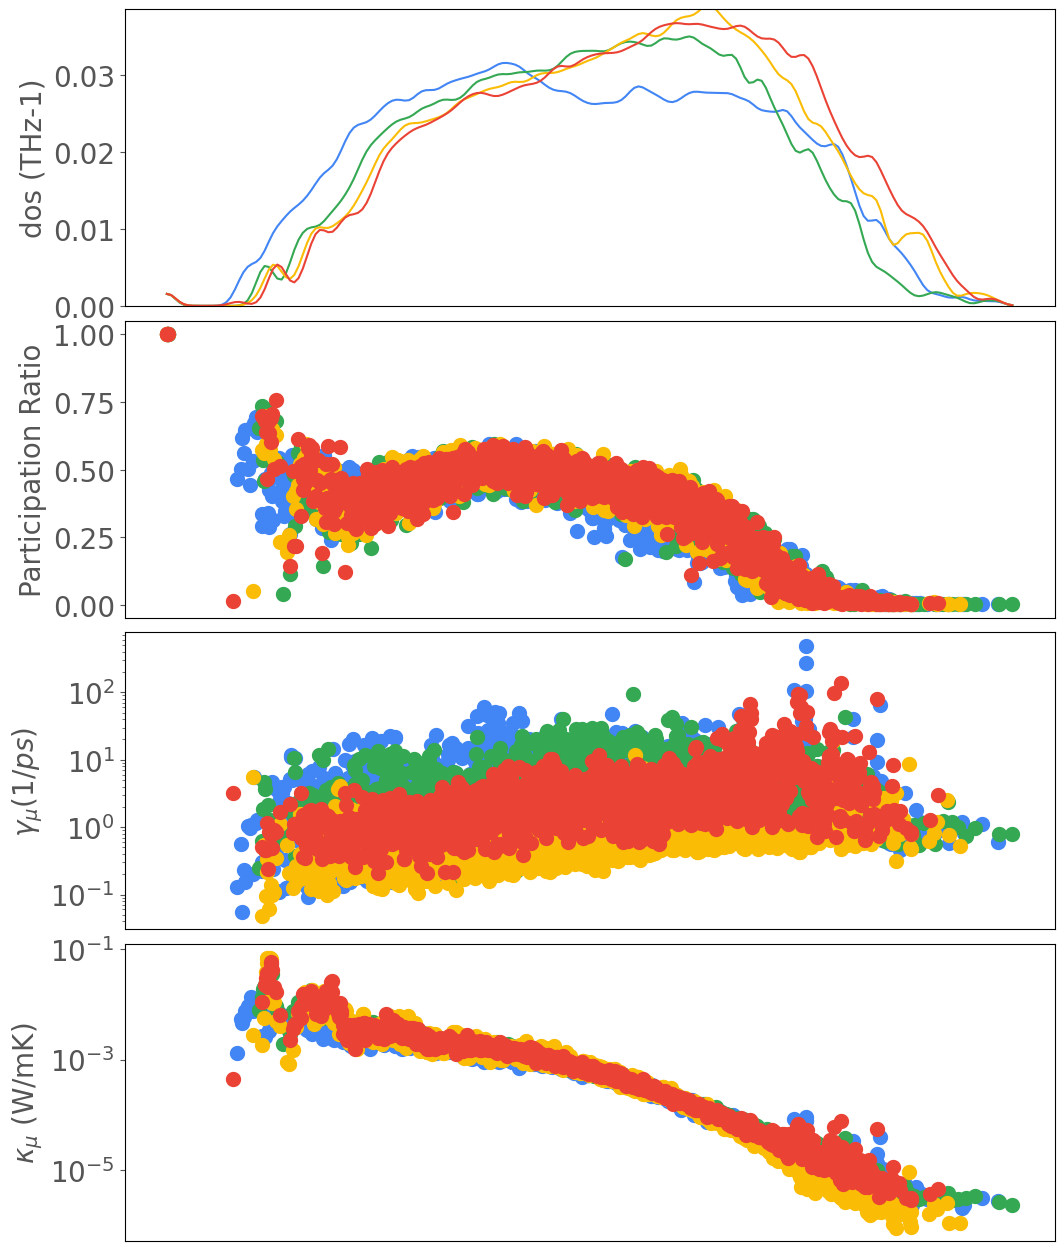

In [40]:
# Figure Adjustments >>>>
fig = plt.figure(figsize=(12, 16))
grid = plt.GridSpec(4, 1, wspace=0.05, hspace=0.05)
ax1 = fig.add_subplot(grid[0, 0])
#ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[2, 0])
ax5 = fig.add_subplot(grid[3, 0])
#axes = [ax1, ax2, ax3, ax4, ax5]
axes = [ax1, ax3, ax4, ax5]
for ax in axes:
    ax.set_xticks([])
    #ax.set_yticks([])

# DoS
ax1.set_ylabel('dos (THz-1)')
for i,p in enumerate(pressure):
    ax1.plot(dosx, dos[i], color=color[i], label=f'{p}GPa')
ax1.set_ylim([0, dos[i].max()*1.05])

# # Velocity
# ax2.set_ylabel('v (A/ps)')
# ax2.set_yscale('log')
# for i,p in enumerate(pressure):
#     ax2.scatter(frequency[i], velocity[i], color=color[i], s=4)
# ax2.scatter(bilyr_f, bilyr_v, color=bic, s=4, linewidth=4, marker='.', alpha=0.8)
# ax2.scatter(molyr_f, molyr_v, color=mic, s=4, linewidth=4, marker='.', alpha=0.8)
# ax2.set_ylim([0.1, bilyr_v.max()*2])
# ax2.set_yticks([1.0, 10])

# # Participation
ax3.set_ylabel('Participation Ratio')
#ax3.set_yscale('log')
for i,p in enumerate(pressure):
    ax3.scatter(frequency[i], participation[i], color=color[i])

# # Bandwidth
ax4.set_ylabel(r'$\gamma_{\mu} (1/ps)$')
ax4.set_yscale('log')
for i,p in enumerate(pressure):
    ax4.scatter(frequency[i], bandwidth[i], color=color[i])

# # Cumulative Conductivity
ax5.set_ylabel(r'$\kappa_{\mu}$ (W/mK)')
ax5.set_yscale('log')
for i,p in enumerate(pressure):
    ax5.scatter(frequency[i], conductivity[i], color=color[i])
# ax5.set_yscale('linear')
# ax5.scatter(bilyr_f, bilyr_k, color=bic, s=4, linewidth=4, marker='.', alpha=0.8)
# ax5.scatter(molyr_f, molyr_k, color=mic, s=4, linewidth=4, marker='.', alpha=0.8)

# wid = 10
# mono = plt.Line2D([],[], color=mic, linewidth=wid)
# bi = plt.Line2D([],[], color=bic, linewidth=wid)
# ax1.legend([mono,bi], ['1', '2'], title='Layers', fontsize=12)